<h1><center>D208: Predictive Modeling</center></h1>
<br>
<center>Task 1: Multiple Linear Regression</center>
<br>
<center></center>
<br>
<center>Department of Information Technology, Western Governor's University</center>
<br>
<center>Dr. Eric Straw</center>
<br>
<center>January 2, 2024</center>
<br>
<br>
<br>
<br>

## A1. Research Question

Since multiple linear regression requires the response variable to be continuous, I am rather limited in the questions I can ask of the medical dataset as many of the variables are categorical. Of all the continuous variables in this dataset, I believe the most important to a hospital or medical organization would be the days hospitalized, which is indicated by the variable named "Initial_days." Decreasing the number of days hospitalized while also still providing quality care ensures that resources such as physicians, medical supplies, and time are not wasted and used efficiently. In addition, shortening days hospitalized should increase patient satisfaction scores so long as adequate time is still taken to care for the patient and they are not rushed out. Thus, identifying the risk factors that contribute to a longer hospital stay could be important for a hospital so the hospital can be proactive instead of reactive when managing patients. Thus, the question I would like to answer using multiple linear regression is as follows: What factors influence the length of a hospital stay?

## A2. Analysis Objectives and Goals
The goal of this multiple linear regression analysis is to identify which variables in the dataset influence days hospitalized the most. In other words, I will attempt to use multiple linear regression to identify the explanatory variables that influence the response variable, Initial_days. Identifying such factors allows the hospital or organization to be proactive in how it manages patients because at least some of the risk factors will be able to be identified at admission. Thus, it will be in the hospital's control to allocate resources adequately and efficiently, which should improve patient satisfaction as well as lower costs for the hospital.

## B1. Multiple Linear Regression Model Assumptions

Multiple linear regression operates on five assumptions, rather than four. Despite the rubric insisting on identifying four, I will note all five assumptions below because I believe it is important to highlight all of them rather than just four of them. It is important that all of the conditions are met. If any are violated, the model may be useless.

Assumption 1: There is a linear relationship between each explanatory variable and the response variable (Zach, 2021). 

This can be ascertained from a scatterplot of each explanatory variable vs the response variable. Visually, the points on such a plot will follow an invisible straight line without curving. If there is no relationship between an explanatory variable and the response variable, there is no need to include that variable in the model, since it predicts nothing about the response variable.

Assumption 2: There is no multicollinearity, that is, no explanatory variable is closely correlated with another (Zach, 2021). 

If two variables are closely related to each other, you must remove one from the model. This is because multiple linear regression tries to determine how much change occurs in the response variable for one unit of change in one explanatory variable while holding all other explanatory variables constant (Frost, 2023). When two variables are multicollinear, a shift in one affects the other, so the model can't accurately estimate the change seen in the response variable for an explanatory variable independently of the variable with which it is multicollinear. In essence, multicollinear variables change together, and their effects on the response variable are hard to separate.

Assumption 3: All the observations in the dataset are independent (Zach, 2021).

This assumption assumes no one observation is related to another. For example, if a data collector was tasked with collecting data on 50 individuals but accidentally surveyed 10 of the individuals twice by mistake, the observations that were included twice would be related to their matches and thus not independent. Data should be collected with a randomized design to prevent observations that are not independent.

Assumption 4: There is homoscedasticity, that is, the residuals have a constant variance (Zach, 2021).

This can be better described as the idea that the distance from the datapoint to the line of best fit does not change much as the explanatory variable's value changes. On a plot of the residuals vs predicted response variable values, there will be no pattern, indicating homoscedasticity. If the residuals vary widely as the explanatory variable's value changes, the model will be unreliable.

Assumption 5: The residuals are normally distributed and make a roughly straight, diagonal line when plotted on a Q-Q plot.

This assumption is fairly straightforward. A Q-Q plot plots the residuals against theoretical quantiles for a normal distribution. If the points vary too significantly from the diagonal reference line on the Q-Q plot, the residuals are not normally distributed.

## B2. Benefits of Programming Language
For this analysis, I will be using Python. There are many reasons Python is ideal for a project such as this. Python is much more versatile than R, which was designed for statistics and data analysis. While that may make it sound like R is a better choice, Python is a versatile general-purpose language which means you can perform almost any data task with just Python and its packages, which all share a common syntax, unlike R (SudoPurge, 2021). Python is also faster than R in terms of how fast computationally intensive code can be run. Lastly, Python is very simple to read and write, giving it an edge over R.

Within Python, I will be using the following packages:

1. Matplotlib.pyplot: I will use matplotlib.pyplot in order to create graphs such as line graphs. This package is also often used in combination with seaborn.
2. Pandas: Pandas is useful because it allows us a framework for working with the data. Without it, using only numpy arrays would be rather clunky. Pandas allows the data to resemble a spreadsheet.
3. Numpy: In this case, I will be using numpy for certain mathematical operations like summing, squaring, or square rooting. This is useful when trying to convert the MSE to a RSE, for example, since RSE is the square root of the MSE.
4. Seaborn: This package is handy in combination with matplotlib.pyplot because it expands the kinds of graphs we can use to plot the data. With seaborn, I can create scatterplots, plots with a line of best fit, and so on.
5. Statsmodels.api, statsmodels.stats, and statsmodels.formula.api: This package and its sub-packages are useful for performing the actual multiple linear regression. It allows for the creation of regression models using ordinary least squares. With this package, I will also be able to create Q-Q plots to check that the residuals are normally distributed, an assumption that must be met in order to perform multiple linear regression. Finally, this package is useful for calculating the variance inflation factor or VIF, which is used in checking for multicollinearity, which is another assumption that must not be violated.
6. Missingno: This package will be imported solely for data cleaning purposes. With the graph it provides, I can visually inspect the dataframe for missing data.

## B3. Justification of Multiple Linear Regression
If the choice of methods is between multiple linear regression and logistic regression, multiple linear regression must be used when attempting to find relationships between explanatory variables of any type and a continuous response variable. Since the response variable in my research question, Initial_days, is a continuous variable, I will choose multiple linear regression as my analysis technique. The response variable data type is the only differentiator between the two methods-- if the response variable in my research question had been categorical, I would have to pick logistic regression instead. In addition to this, since I want to examine the possible relationships between a continuous response variable and many explanatory variables (many "factors,") simple linear regression cannot be used. Multiple linear regression is appropriate for the analysis of many explanatory variables.

## C1. Data Cleaning and Preparation Goals
In this section, I will focus on my goals and steps to achieve said goals as they pertain solely to data cleaning. Any data wrangling tasks, such as one-hot encoding, will be discussed in section C4.

As with any dataset, there are four broad goals for data cleaning.

1. Identify and treat outliers.

Multiple linear regression is sensitive to outliers. Outliers should only be kept if they seem reasonable given domain knowledge and common sense.  The function find_outliers_IQR() identifies outliers based on the interquartile range and its purpose is to help me be able to read boxplots, which are hard to read when there are hundreds of outliers represented by dots on either side of the "whiskers" in the plots. To identify outliers, the first step I took was to generate a boxplot for every applicable quantitative variable. If no outliers were present based on a visual inspection of the boxplot for each variable, I skipped using find_outliers_IQR(). If there were dots on either side of the boxplot "whiskers," however, I fed the variable into this function to get more details such as the specific ranges, values, and total number of outliers. This informed me enough to then make a judgment call on whether or not to keep the outliers, since not all outliers are inaccurate data.

Using a combination of boxplots to visually assess whether or not outliers exist and the custom function find_outliers_IQR(), I found outliers in Population, Children, Income, vitD_levels, Full_meals_eaten, VitD_supp, and Additional_charges. After inspecting the outlier ranges for each of these variables, I concluded that none of the outliers seemed outside of my expectations or erroneous in nature. The only variable I lack domain knowledge for is vitD_levels, but Vitamin D levels can range from below 12 ng/mL to over 50 ng/mL, and there are no islands of extremely high or low values that might imply that different units of measurement are the reason for these outliers (U.S. Department of Health and Human Services, 2022).

2. Identify and treat duplicates.

I used two methods to identify duplicates. First, I simply checked for uniqueness in customer_id, interaction, and UID. The data dictionary states that these variables should be unique in nature, thus I expected to get 10,000 as the count for each column, and I did. I used this step in an attempt to find duplicate customers where data might differ between the identical customer_ids. The second method I used was calling .duplicated.value_counts() to check for complete duplicates, where the information in every column for one record is the same as another record. This returned 10,000 false, meaning it found no complete duplicates.

3. Identify and treat missing data.

Once again, I used two methods to check for missing data. First, I checked df.info() for the non-null count column. If there are no missing datapoints, every row should show 10,000 non-null, which was indeed the case. Just for good measure, I also used msno.matrix to provide a visual representation of how complete the dataset was. This visual representation showed black bars for every column with no white lines across the bars indicating a missing value. Thus, I determined there are no missing datapoints.

4. Ensure that the columns of the dataframe are stored as the correct datatype and that categories are not superfluous.

Since the dataset was stored as a CSV, many of the column datatypes were incorrect upon import. This was identified using df.info(), which shows the datatype for each column. I compared this to the data dictionary and made a determination on how each column should be stored. To check for superfluous categories in categorical variables, I used .value_counts and a visual inspection. 

Variables that were incorrect included the following. Zip codes were stored as integers and thus had leading zeros missing, timezones had far too many superfluous categories that could be stored as the commonly known US timezones instead (Eastern, Central, etc,) initial_days, totalCharge, and additional_charges are all far too precise, the variables following the naming convention Item# were incorrectly stored as integers when they should be ordered categorical variables, and many of the categorical variables were stored as strings instead of the category datatype.

To clean up the zip codes, I converted these to the string datatype and filled the beginning with zeros for a maximum of five characters.

For the timezones, I created a dictionary that maps the existing categories to the more commonly known timezones such as eastern, central, mountain, and so on. After having done that, I converted the column to the category datatype.

Initial_Days was converted to the integer datatype and totalCharge and and additional_charges were rounded to the appropriate number of decimal points. Since totalCharge and additional_charges are monetary values, they were rounded to two decimal points.

All the variables following the naming convention Item# were converted to the ordered categorical datatype to prevent out-of-bounds entries.

Lastly, all of the categorical variables stored as strings were converted to the category datatype. This helps preserve data integrity.

While there are still more issues to treat, these are the ones that pertain solely to data cleaning. Much of the code you will find below is very similar to the code used for my D206 project. Goals that will be further described in **section C4** include the re-expression of the yes/no categorical variables as numeric, creating dummy variables for nominal categorical variables, and creating a new dataframe that will hold only the variables of interest for multiple linear regression. I consider these goals to pertain more to data wrangling and transformation.

Please use the attached ipynb file as the executable code required by this section.

### Cleaning Detection Code

In [1]:
#[In-Text Citation: (Nelson, 2023).]
import pandas as pd
from pandas.api.types import CategoricalDtype
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import qqplot
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

#load csv into pandas dataframe. The CSV's first column is an index, so we let pandas know that too.
df=pd.read_csv('C:/Users/essay/Documents/D208 PA Dataset/medical_clean.csv', index_col = 0)

#visually inspect dataframe's datatypes and size to ensure it loaded properly.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [2]:
# Visually inspect dataframe to ensure data loaded as expected and do initial visual exploration
pd.set_option("display.max_columns", None)
df.head(10)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,America/Chicago,Corporate treasurer,3,76,81999.88,Never Married,Male,No,19.612646,6,0,0,No,Observation Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Blood Work,5.957250,2636.691180,12742.589910,4,5,4,4,3,5,4,6
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,America/New_York,Hydrologist,0,50,10456.05,Never Married,Male,No,14.751687,6,0,0,No,Emergency Admission,Yes,No,Low,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Intravenous,9.058210,3694.627161,16815.513600,4,3,3,2,3,4,5,5
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,America/New_York,Psychiatric nurse,7,40,38319.29,Divorced,Female,No,19.688673,7,2,0,No,Observation Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Intravenous,14.228019,3021.499039,6930.572138,1,2,2,5,4,2,4,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,America/Chicago,Computer games developer,0,48,55586.48,Widowed,Male,No,19.653320,6,3,0,No,Emergency Admission,No,No,Low,Yes,No,No,Yes,No,No,No,No,No,Intravenous,6.180339,2968.402860,8363.187290,3,3,2,3,3,3,4,2


In [3]:
# define function for outlier detection throughout the following code. [In-Text Citation: (Kleppen, 2023).]
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [4]:
# Check uniqueness constraints on Customer_id, Interaction, and UID all at once using for loop
# I expect 10,000 records for each. If 10,000 is the result for each, then I have no duplicates.
unique_cols = df[['Customer_id', 'Interaction', 'UID']]
for col in unique_cols:
    print(col)
    print(unique_cols[col].value_counts().count())

Customer_id
10000
Interaction
10000
UID
10000


In [5]:
# Identify complete duplicates, if any
print(df.duplicated().value_counts())

False    10000
dtype: int64


In [6]:
# Check if data seems reasonable
df.Population.describe()

count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

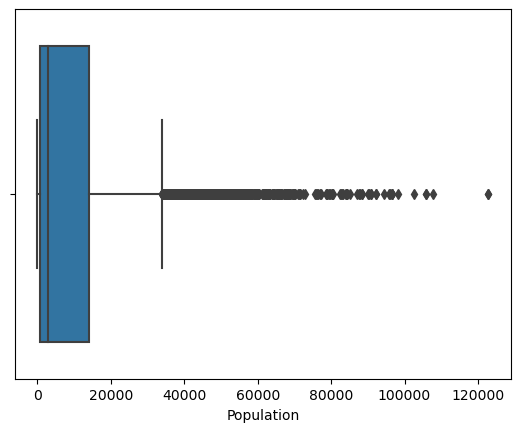

In [7]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Population', data = df)

In [8]:
# Get number of outliers, their value range, and also the whole list of them.
outliers_pop = find_outliers_IQR(df['Population'])
print("number of outliers: " + str(len(outliers_pop)))
print("outliers between: " + str(outliers_pop.min()) + " and " + str(outliers_pop.max()))
pd.set_option("display.max_rows", None)
outliers_pop

number of outliers: 855
outliers between: 33894 and 122814


CaseOrder
9         40029
12        35369
33        40051
38        38835
71        40824
79        49034
89        45736
100       43706
109       36119
116       39711
119       48483
154       56458
161       62718
164       60238
183       35035
207       41440
228       34225
231       59191
244       65151
248       53211
252       34839
264       35388
269       35102
289       54453
312       41503
317       34311
323       39946
325       36986
327       39786
337       54776
346       33908
366       55361
394       69802
399       35690
412       47231
415       47247
420       40837
423       60191
441       49907
442       38406
464       39985
470       68796
476       36158
485       41973
499       44571
502       36260
532       70199
584       52117
592       59129
595       57955
596       37988
602       42045
612       90761
622       71587
626       36792
639       34503
645       36154
658       63177
660       64197
664       42821
666       40532
667       3464

In [9]:
# Check for superfluous/typoed categories
df.Area.value_counts()

Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64

In [10]:
# Check for superfluous/typoed categories
df.TimeZone.value_counts()

America/New_York                  3889
America/Chicago                   3771
America/Los_Angeles                937
America/Denver                     612
America/Detroit                    262
America/Indiana/Indianapolis       151
America/Phoenix                    100
America/Boise                       86
America/Anchorage                   50
America/Puerto_Rico                 43
Pacific/Honolulu                    34
America/Menominee                   14
America/Nome                        12
America/Indiana/Vincennes            8
America/Kentucky/Louisville          6
America/Sitka                        6
America/Toronto                      5
America/Indiana/Marengo              3
America/Indiana/Tell_City            3
America/North_Dakota/Beulah          2
America/Yakutat                      1
America/Indiana/Winamac              1
America/Indiana/Knox                 1
America/North_Dakota/New_Salem       1
America/Indiana/Vevay                1
America/Adak             

In [11]:
# Check for superfluous/typoed categories
df.Job.value_counts()

Outdoor activities/education manager                           29
Exhibition designer                                            27
Theatre director                                               27
Scientist, audiological                                        26
Toxicologist                                                   25
Research scientist (life sciences)                             25
Orthoptist                                                     25
Technical sales engineer                                       25
Astronomer                                                     25
Estate agent                                                   25
Marketing executive                                            25
Production assistant, radio                                    25
Neurosurgeon                                                   25
Lobbyist                                                       25
Jewellery designer                                             25
Broadcast 

In [12]:
# Check that data seems reasonable
df.Children.describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

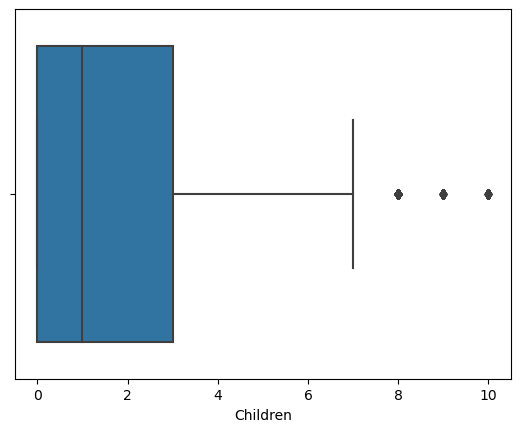

In [13]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Children', data = df)

In [14]:
# Get number of outliers, their value range, and also the whole list of them.
outliers_children = find_outliers_IQR(df['Children'])
print("number of outliers: " + str(len(outliers_children)))
print("outliers between: " + str(outliers_children.min()) + " and " + str(outliers_children.max()))
pd.set_option("display.max_rows", None)
outliers_children

number of outliers: 411
outliers between: 8 and 10


CaseOrder
17       10
42        8
64        8
80        9
147       9
156       8
157      10
171       8
175       8
181      10
186      10
189       8
207       8
220      10
249       8
254       8
263       8
278       8
289       9
325       9
362       9
374       8
376       9
428       8
431       8
447      10
450       9
488       9
513       8
567       8
585       8
588       8
598      10
609       9
613       8
747       8
784       9
802      10
809       8
814       8
822       8
835       9
846       8
915       9
959       8
968       9
980       8
1002      8
1038      8
1048      8
1049      9
1076      8
1094     10
1139      8
1149      8
1169      8
1171      9
1188      9
1329     10
1394     10
1421      8
1436      8
1470      9
1507      8
1523      8
1536      8
1568      8
1570     10
1574     10
1586     10
1624     10
1634      8
1637      9
1722     10
1727      9
1753      8
1776     10
1822      8
1904      9
1962      8
2014     10
2055     10
2069  

In [15]:
# Check that data seems reasonable
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

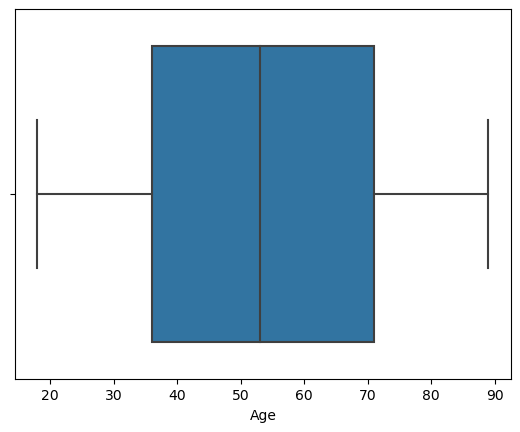

In [16]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Age', data = df)

In [17]:
# Check that data seems reasonable
df.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

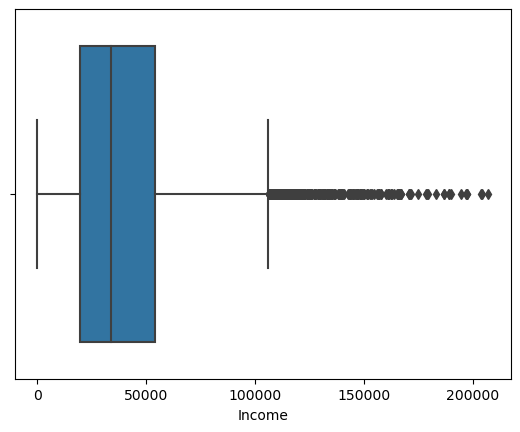

In [18]:
# Max seems reasonable, but min seems low. Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Income', data = df)

In [19]:
# Get number of outliers, their value range, and also the whole list of them.
outliers_Income = find_outliers_IQR(df['Income'])
print("number of outliers: " + str(len(outliers_Income)))
print("outliers between: " + str(outliers_Income.min()) + " and " + str(outliers_Income.max()))
pd.set_option("display.max_rows", None)
outliers_Income

number of outliers: 326
outliers between: 106521.92 and 207249.1


CaseOrder
31      167105.10
37      122615.82
59      132963.95
64      128855.39
78      135288.23
87      114525.82
174     178470.63
181     128959.11
191     131682.02
220     146378.38
249     108278.74
362     136468.34
408     121385.63
418     132010.48
529     118099.72
556     108279.93
583     125977.37
612     128108.35
623     171288.05
723     113672.54
733     124905.92
765     110089.13
835     112201.29
842     204542.41
872     107115.94
896     116478.20
904     129098.71
918     129123.73
958     106521.92
963     138456.69
985     116583.66
1040    111242.16
1063    110046.56
1074    120273.05
1096    116549.66
1106    120700.01
1109    167286.62
1342    129987.32
1353    109948.46
1373    127505.80
1472    147570.86
1515    121766.35
1534    116654.47
1560    108990.15
1591    158173.60
1651    110189.06
1666    119102.35
1678    117236.40
1724    148809.86
1779    197576.18
1801    133047.11
1813    111165.94
1846    114487.23
1892    113659.99
1907    112927.61


In [20]:
# Check for superfluous/typoed categories
df.Marital.value_counts()

Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64

In [21]:
# Check for superfluous/typoed categories
df.Gender.value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [22]:
# Check that all are Yes or No (or NaN, determined earlier)
df.ReAdmis.value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

In [23]:
# Check that data seems reasonable
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

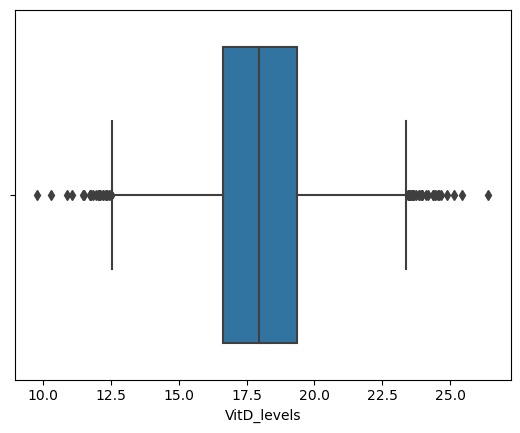

In [24]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'VitD_levels', data = df)

In [25]:
# Get number of outliers and the whole list of them. Since two ranges, upper and lower, sort to better see those ranges.
outliers_VitD = find_outliers_IQR(df['VitD_levels'])
print("outliers between: " + str(outliers_VitD.min()) + " and " + str(outliers_VitD.max()))
print("number of outliers: " + str(len(outliers_VitD)))
pd.set_option("display.max_rows", None)
outliers_VitD.sort_values()

outliers between: 9.806483 and 26.39444871
number of outliers: 60


CaseOrder
8141     9.806483
3289    10.315234
1316    10.877427
5259    11.083430
636     11.475314
5066    11.538730
9271    11.751060
8492    11.755560
510     11.785395
7188    11.846830
6793    11.966340
9510    12.038470
4382    12.062467
1629    12.072534
4260    12.074147
1440    12.091658
8198    12.118830
3503    12.207388
7226    12.219040
813     12.313590
9048    12.317130
338     12.325488
4650    12.355875
791     12.433745
7288    12.507730
9788    12.509160
1542    12.509970
1538    23.442725
2616    23.453194
9512    23.476530
1349    23.501133
6579    23.505870
4225    23.507827
5340    23.524230
6065    23.527640
6673    23.531320
3492    23.593703
9224    23.615650
8022    23.624500
65      23.662948
8576    23.739160
7158    23.833530
2705    23.852194
468     23.906407
3564    23.938421
1664    23.941426
8844    24.098840
8409    24.166720
6948    24.356250
2383    24.371580
4530    24.421656
8349    24.450370
8851    24.538710
508     24.559132
23      24.565463


In [26]:
# Check that data seems reasonable
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

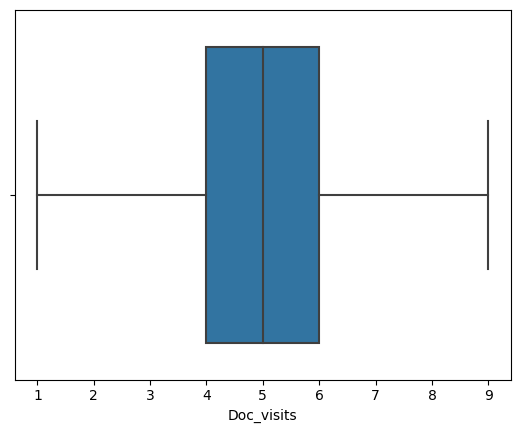

In [27]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Doc_visits', data = df)

In [28]:
# Check that data seems reasonable
df.Full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

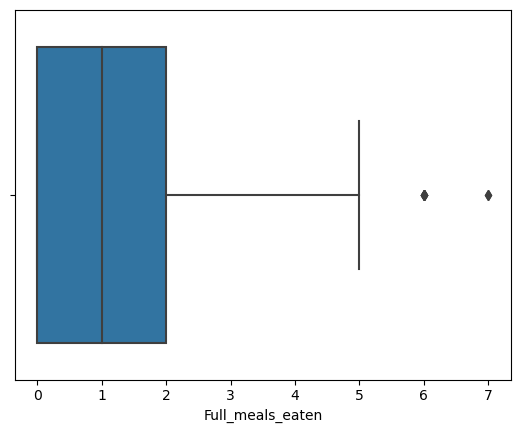

In [29]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Full_meals_eaten', data = df)

In [30]:
# Get number of outliers, their value range, and also the whole list of them.
outliers_meals = find_outliers_IQR(df['Full_meals_eaten'])
print("number of outliers: " + str(len(outliers_meals)))
print("outliers between: " + str(outliers_meals.min()) + " and " + str(outliers_meals.max()))
pd.set_option("display.max_rows", None)
outliers_meals

number of outliers: 8
outliers between: 6 and 7


CaseOrder
959     7
1232    6
2185    6
4710    7
6069    6
7218    6
8145    6
9987    6
Name: Full_meals_eaten, dtype: int64

In [31]:
# Check that data seems reasonable
df.vitD_supp.describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

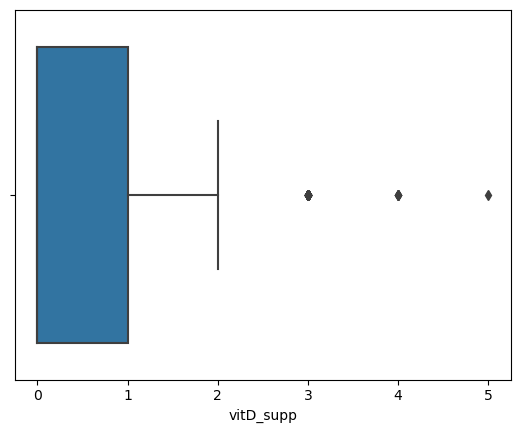

In [32]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'vitD_supp', data = df)

In [33]:
# Get number of outliers, their value range, and also the whole list of them.
outliers_supp = find_outliers_IQR(df['vitD_supp'])
print("number of outliers: " + str(len(outliers_supp)))
print("outliers between: " + str(outliers_supp.min()) + " and " + str(outliers_supp.max()))
pd.set_option("display.max_rows", None)
outliers_supp

number of outliers: 70
outliers between: 3 and 5


CaseOrder
63      3
64      3
207     3
250     3
838     3
1049    3
1343    4
1474    3
1661    3
1676    3
1713    3
1753    3
2129    3
2152    3
2309    3
2359    3
2534    4
2716    4
2957    3
3132    5
3216    3
3263    3
3494    3
3628    3
3815    3
3901    3
4003    3
4069    3
4159    3
4164    3
4297    3
4399    3
4407    3
4568    3
4845    3
4861    3
5000    3
5045    3
5217    3
5352    3
5534    3
5584    3
6217    3
6385    3
6416    3
6525    3
6733    3
7150    3
7181    4
7216    3
7218    3
7344    3
7413    3
7472    3
7474    3
7707    3
7890    3
8070    3
8246    3
8300    3
8350    3
8406    3
8494    3
8653    3
9016    3
9092    4
9590    3
9791    3
9909    3
9983    3
Name: vitD_supp, dtype: int64

In [34]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Soft_drink.value_counts()

No     7425
Yes    2575
Name: Soft_drink, dtype: int64

In [35]:
# Check for superfluous/typoed categories
df.Initial_admin.value_counts()

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

In [36]:
# Check that all are Yes or No (or NaN, determined earlier)
df.HighBlood.value_counts()

No     5910
Yes    4090
Name: HighBlood, dtype: int64

In [37]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Stroke.value_counts()

No     8007
Yes    1993
Name: Stroke, dtype: int64

In [38]:
# Check for superfluous/typoed categories
df.Complication_risk.value_counts()

Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

In [39]:
# Check that all are Yes or No
df.Overweight.value_counts()

Yes    7094
No     2906
Name: Overweight, dtype: int64

In [40]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Arthritis.value_counts()

No     6426
Yes    3574
Name: Arthritis, dtype: int64

In [41]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Diabetes.value_counts()

No     7262
Yes    2738
Name: Diabetes, dtype: int64

In [42]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Hyperlipidemia.value_counts()

No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64

In [43]:
# Check that all are Yes or No (or NaN, determined earlier)
df.BackPain.value_counts()

No     5886
Yes    4114
Name: BackPain, dtype: int64

In [44]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Anxiety.value_counts()

No     6785
Yes    3215
Name: Anxiety, dtype: int64

In [45]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Allergic_rhinitis.value_counts()

No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64

In [46]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Reflux_esophagitis.value_counts()

No     5865
Yes    4135
Name: Reflux_esophagitis, dtype: int64

In [47]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Asthma.value_counts()

No     7107
Yes    2893
Name: Asthma, dtype: int64

In [48]:
# Check for superfluous/typoed categories
df.Services.value_counts()

Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: Services, dtype: int64

In [49]:
# Check that data seems reasonable
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

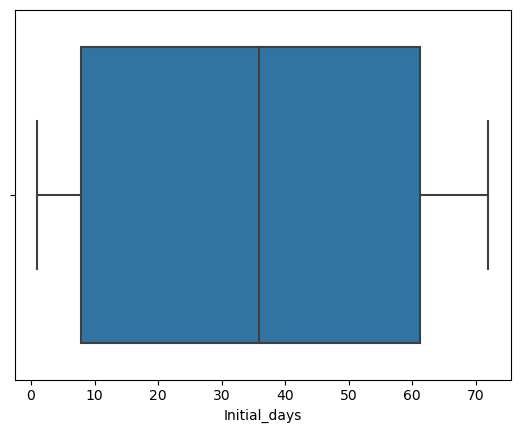

In [50]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Initial_days', data = df)

In [51]:
# Check that data seems reasonable
df.TotalCharge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

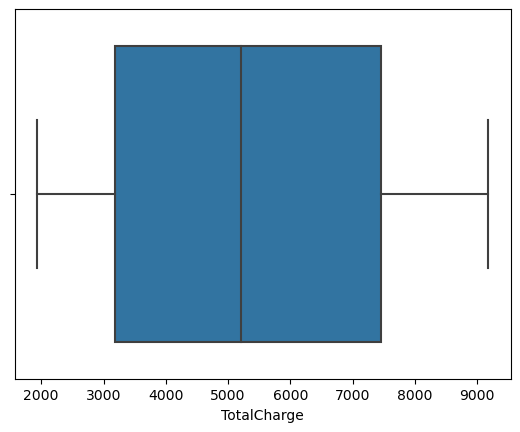

In [52]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'TotalCharge', data = df)

In [53]:
# Check that data seems reasonable
df.Additional_charges.describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

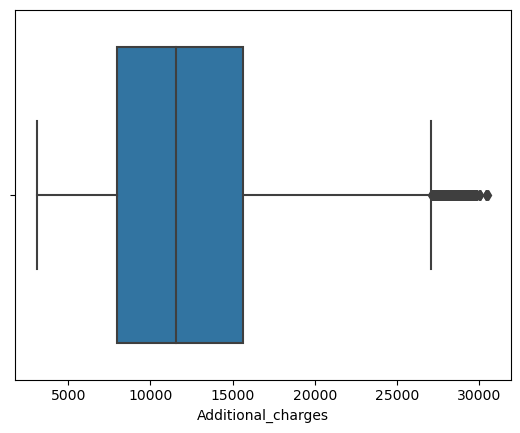

In [54]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Additional_charges', data = df)

In [55]:
# Get number of outliers, their value range, and also the whole list of them.
outliers_addl = find_outliers_IQR(df['Additional_charges'])
print("number of outliers: " + str(len(outliers_addl)))
print("outliers between: " + str(outliers_addl.min()) + " and " + str(outliers_addl.max()))
pd.set_option("display.max_rows", None)
outliers_addl

number of outliers: 424
outliers between: 27088.15 and 30566.07


CaseOrder
21      28788.08031
82      28102.95750
102     28297.97033
103     29021.25261
115     28830.32716
155     28961.00586
185     28963.52738
216     27472.01292
242     27133.74812
272     29795.62246
294     27940.29515
369     28673.17177
378     27472.77004
389     27671.18182
398     27482.80771
431     29198.85776
452     28987.60257
462     27973.91489
472     28212.61312
486     30087.65094
498     28983.36505
502     27455.33202
537     28990.15443
575     27988.16448
605     29222.45308
613     28548.00003
629     28794.22431
634     28726.75105
680     29083.23523
686     28831.20614
688     27682.48218
718     29096.08237
722     28112.53552
726     27963.53338
732     27891.41761
750     29837.70749
760     27127.60412
769     27162.54641
787     28276.68820
797     27162.54641
852     27165.09827
862     28765.52579
879     27430.74090
895     27401.70104
899     29544.95222
952     29223.41830
962     28187.40490
989     27553.79336
1027    27861.35972
1037    29

In [56]:
# Ensure data is restricted to categories 1 through 8
df.Item1.value_counts()

4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: Item1, dtype: int64

In [57]:
# Ensure data is restricted to categories 1 through 8
df.Item2.value_counts()

3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: Item2, dtype: int64

In [58]:
# Ensure data is restricted to categories 1 through 8
df.Item3.value_counts()

4    3464
3    3379
5    1358
2    1356
6     220
1     211
7      11
8       1
Name: Item3, dtype: int64

In [59]:
# Ensure data is restricted to categories 1 through 8
df.Item4.value_counts()

3    3422
4    3394
5    1388
2    1346
6     231
1     207
7      12
Name: Item4, dtype: int64

In [60]:
# Ensure data is restricted to categories 1 through 8
df.Item5.value_counts()

4    3446
3    3423
2    1380
5    1308
6     219
1     211
7      13
Name: Item5, dtype: int64

In [61]:
# Ensure data is restricted to categories 1 through 8
df.Item6.value_counts()

4    3464
3    3371
5    1403
2    1319
6     220
1     213
7      10
Name: Item6, dtype: int64

In [62]:
# Ensure data is restricted to categories 1 through 8
df.Item7.value_counts()

4    3487
3    3456
2    1345
5    1274
1     215
6     212
7      11
Name: Item7, dtype: int64

In [63]:
# Ensure data is restricted to categories 1 through 8
df.Item8.value_counts()

3    3401
4    3337
5    1429
2    1391
6     221
1     209
7      12
Name: Item8, dtype: int64

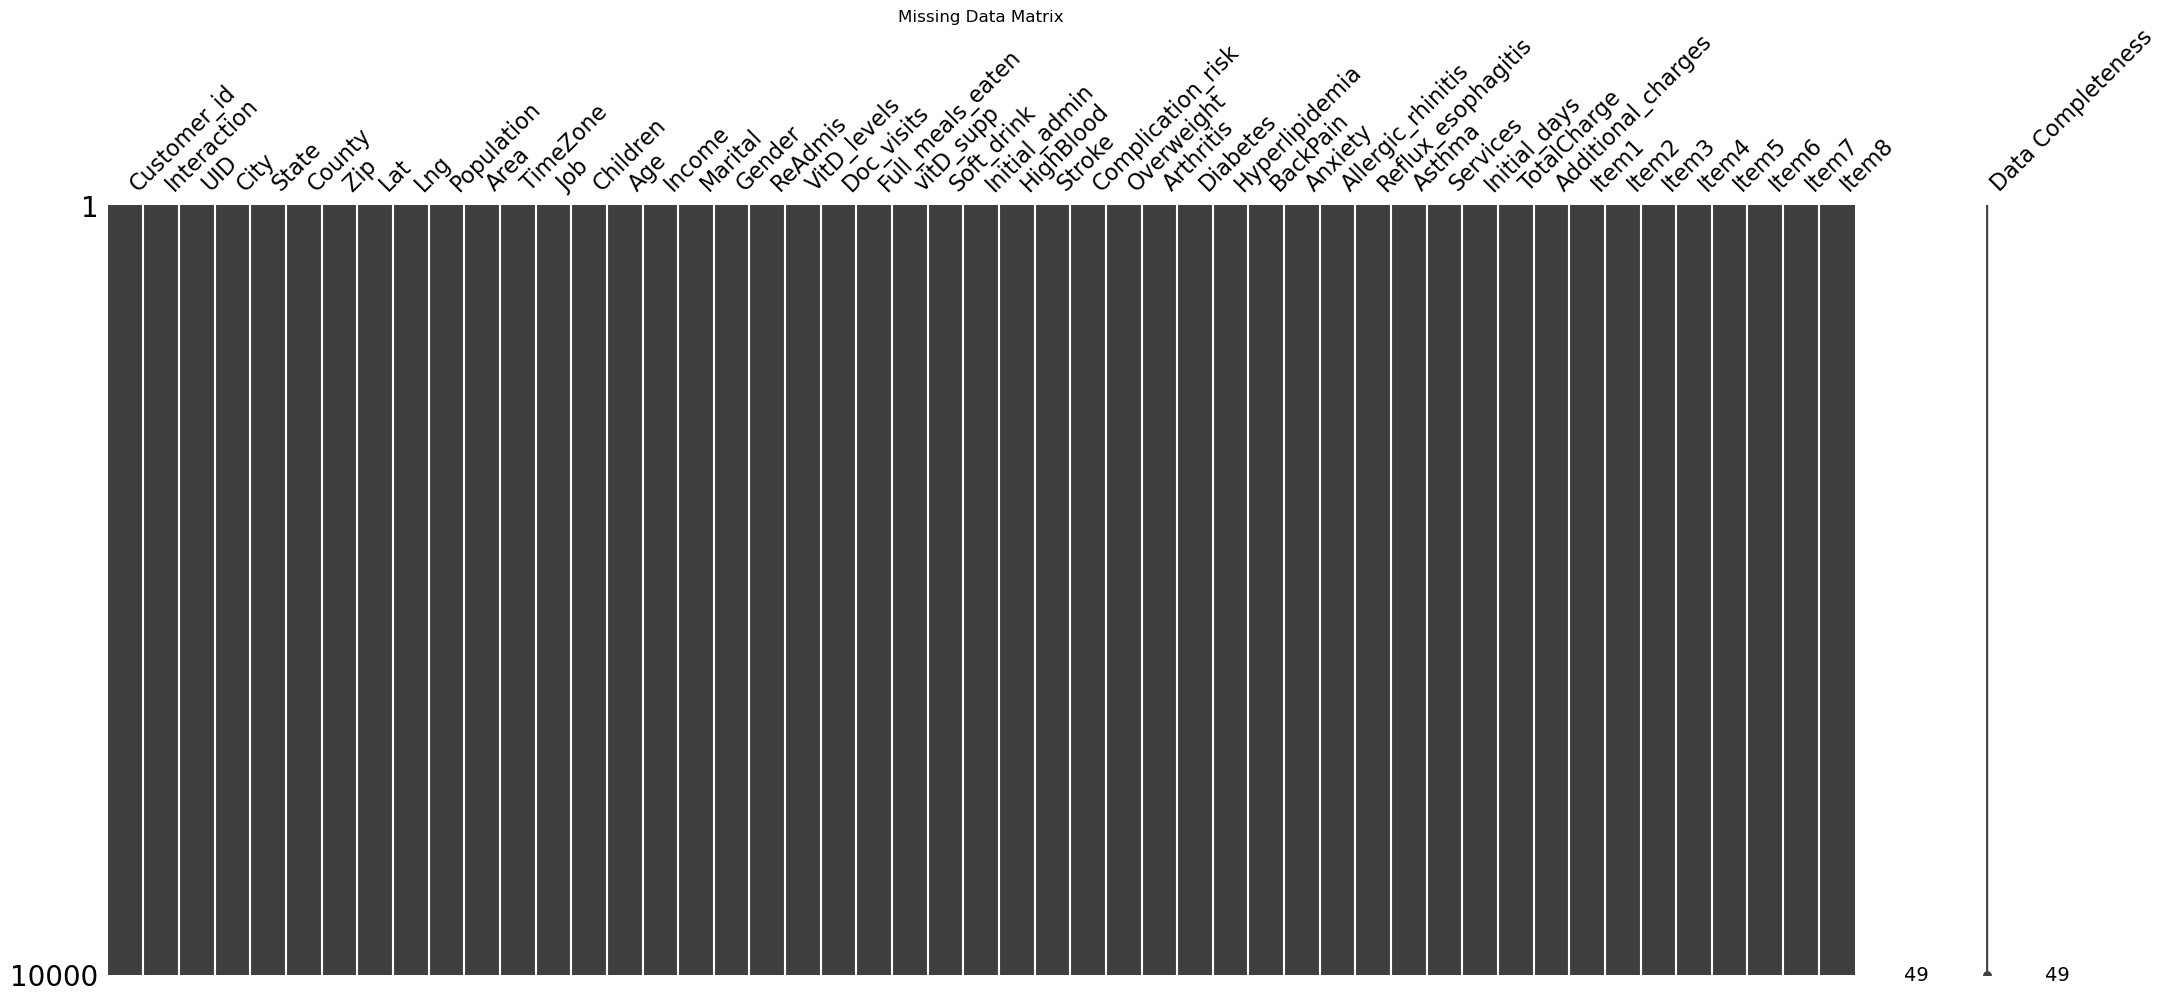

In [64]:
# Visually identify columns with missing data, determine randomness

"""
There are compatibility issues between matplotlib and missingno, detailed below.
You must run either missingno ver. 0.5.2 and the latest ver. of matplotlib, or 
missingno ver. 0.4.2 and matplotlib ver. 3.6.2
Anaconda only allows missingno ver. 0.4.2 at this time, forcing me to use matplotlib ver. 3.6.2.
"""
# Visually inspect missing data as it is ordered originally
msno.matrix(df, labels = True)
plt.title('Missing Data Matrix')
plt.show()

### Cleaning Treatment Code

In [65]:
#Clean datatypes up using code from D206 PA. 
#[In-Text Citation: (Nelson, 2023).]

# Convert Zip to string from integer.
df['Zip'] = df['Zip'].astype('str')
# Add leading zeros using zfill()
df['Zip'] = df['Zip'].str.zfill(5)
# Identify columns that can be converted all at once to category datatype using for loop.
category_cols = df[['Area', 'Marital', 'Initial_admin', 'Complication_risk', 'Services', 'ReAdmis',
                         'Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
                         'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]
# Will do Item# columns later since they require an order. Timezone needs a dict written, will do that later too.
for col in category_cols:
    df[col] = df[col].astype('category')
# Write dictionary for option reduction for Timezone column
mapping_timezone = {'America/Puerto_Rico' : 'Atlantic',
          'America/New_York' : 'Eastern',
          'America/Detroit' : 'Eastern',
          'America/Indiana/Indianapolis' : 'Eastern',
          'America/Indiana/Vevay' : 'Eastern',
          'America/Indiana/Vincennes' : 'Eastern',
          'America/Kentucky/Louisville' : 'Eastern',
          'America/Toronto' : 'Eastern',
          'America/Indiana/Marengo' : 'Eastern',
          'America/Indiana/Winamac' : 'Eastern',
          'America/Chicago' : 'Central',
          'America/Menominee' : 'Central',
          'America/Indiana/Knox' : 'Central',
          'America/Indiana/Tell_City' : 'Central',
          'America/North_Dakota/Beulah' : 'Central',
          'America/North_Dakota/New_Salem' : 'Central',
          'America/Denver' : 'Mountain',
          'America/Boise' : 'Mountain',
          'America/Phoenix' : 'Mountain',
          'America/Los_Angeles' : 'Pacific',
          'America/Nome' : 'Alaskan',
          'America/Anchorage' : 'Alaskan',
          'America/Sitka' : 'Alaskan',
          'America/Yakutat' : 'Alaskan',
          'America/Adak' : 'Hawaiian',
          'Pacific/Honolulu' : 'Hawaiian'
          }
# Use dictionary to convert timezone options.
df.TimeZone.replace(mapping_timezone, inplace=True)
# Convert timezone to category datatype.
df['TimeZone'] = df['TimeZone'].astype('category')
# Convert gender to category datatype.
df['Gender'] = df['Gender'].astype('category')
# Convert Overweight to category datatype.
df['Overweight'] = df['Overweight'].astype('category')
# Convert Anxiety to category datatype.
df['Anxiety'] = df['Anxiety'].astype('category')

# Create ordered categories for Item# variables. 8 is "least important" and 1 is "most important"
survey_scores = CategoricalDtype(categories=['8', '7', '6', '5', '4', '3', '2', '1'], ordered=True)
# Identify columns that need to become ordered categorical
ord_cat_cols = df[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]
# Create for loop to convert columns above to string (issues if not string first,) then ordered categorical datatype.
for col in ord_cat_cols:
    df[col] = df[col].astype('str')
    df[col] = df[col].astype(survey_scores)
# convert Initial_days to an integer.
df['Initial_days'] = df['Initial_days'].astype('int64')
# Round TotalCharge to 2 decimal places
df['TotalCharge'] = df.TotalCharge.round(2)
# Round Additional_charges to 2 decimal places
df['Additional_charges'] = df.Additional_charges.round(2)

In [66]:
#Re-inspect dataframe to see if changes took.
df.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_id         10000 non-null  object  
 1   Interaction         10000 non-null  object  
 2   UID                 10000 non-null  object  
 3   City                10000 non-null  object  
 4   State               10000 non-null  object  
 5   County              10000 non-null  object  
 6   Zip                 10000 non-null  object  
 7   Lat                 10000 non-null  float64 
 8   Lng                 10000 non-null  float64 
 9   Population          10000 non-null  int64   
 10  Area                10000 non-null  category
 11  TimeZone            10000 non-null  category
 12  Job                 10000 non-null  object  
 13  Children            10000 non-null  int64   
 14  Age                 10000 non-null  int64   
 15  Income              10000 non-null  

In [67]:
df.head(10)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,Central,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10,3726.70,17939.40,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,Central,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15,4193.19,17613.00,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,Central,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4,2434.23,17505.19,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,Central,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1,2127.83,12993.44,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,Eastern,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1,2113.07,3716.53,2,1,3,3,5,3,4,3
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,Central,Corporate treasurer,3,76,81999.88,Never Married,Male,No,19.612646,6,0,0,No,Observation Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Blood Work,5,2636.69,12742.59,4,5,4,4,3,5,4,6
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,Eastern,Hydrologist,0,50,10456.05,Never Married,Male,No,14.751687,6,0,0,No,Emergency Admission,Yes,No,Low,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Intravenous,9,3694.63,16815.51,4,3,3,2,3,4,5,5
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,Eastern,Psychiatric nurse,7,40,38319.29,Divorced,Female,No,19.688673,7,2,0,No,Observation Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Intravenous,14,3021.50,6930.57,1,2,2,5,4,2,4,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,Central,Computer games developer,0,48,55586.48,Widowed,Male,No,19.653320,6,3,0,No,Emergency Admission,No,No,Low,Yes,No,No,Yes,No,No,No,No,No,Intravenous,6,2968.40,8363.19,3,3,2,3,3,3,4,2


## C2. Data Exploration Using Summary Statistics
For this multiple linear regression analysis, I will use initial_days as my response variable, y. Included also are the explanatory variables (x) I have chosen for my initial model. Since I am performing these summary statistics before data wrangling and transformation, .describe() will only be used for the quantitative variables. This will provide the mean, median, and mode for such variables. For the categorical variables, which are non-numeric since data wrangling has yet to be performed, I will use .value_counts() to summarize them instead.

In [68]:
# Summary stats for response variable, Initial_days
df.Initial_days.describe()

count    10000.000000
mean        33.956000
std         26.301628
min          1.000000
25%          7.000000
50%         35.500000
75%         61.000000
max         71.000000
Name: Initial_days, dtype: float64

#### Initial Days
In the above summary statistics, we can see the mean, known to most as the average, is 33.956 days. The mean is calculated by adding up all of the days hospitalized for each patient in the dataset and dividing by the total number of patients. The mean tells us many hospitalizations last about 33.956 days. The median of the dataset, also known as the middle value when you order the days hospitalized from smallest to largest, is 35.5 days. It is interesting to note that the mean is less than the median, indicating that the distribution may skew left somewhat. However, without looking at the distribution visually, we cannot be certain. There is a possibility of a bimodal distribution. The mean is pulled to the left by the tail of this skew distribution. The standard deviation of this variable is 26.301628 days. Standard deviation measures how much variation from the mean is typical. We can use standard deviation to say that 68% of the data will fall within 1 standard deviation from the mean, meaning that for this dataset, 68% of hospitalizations will be between 7.655 days and 60.257 days. The range, however, shows hospitalizations have a minimum of 1 day and a maximum of 71 days.

In [69]:
# Summary stats for explanatory variable Age
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

#### Age
In the above summary statistics for age, we can see the mean, or average, is 53.5117 years old, which means many patients who are hospitalized are about 53.5117 years old. Please refer to the above discussion for the definition of mean. The median of the dataset, also known as the middle value, is 53 years old. In this case, the mean and median are very similar. This indicates that the distribution is fairly symmetrical, with little skew. The standard deviation of this variable is 20.638538 years. As aforementioned, standard deviation measures how much variation from the mean is typical. Again, we can use standard deviation to say that 68% of the data will fall within 1 standard deviation from the mean, meaning that for this dataset, 68% of patients will be between the ages of 32.873 and 74.149. The range, however, shows patients have a minimum age of 18 and a maximum age of 89 years old. This means that no children are present in our dataset, even if they do get hospitalized from time to time.

In [70]:
# Summary stats for explanatory variable Doc_visits
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

#### Doctor Visits
In the above summary statistics for doc_visits, we can see the mean is 5.0122 visits. Many people who are hospitalized end up seeing a doctor about 5 times. Please refer to the above discussion for the definition of mean. The median of the dataset, or the middle value, is 5 visits. This is another case where the mean and median are very similar. This again indicates that the distribution is fairly symmetrical, with little skew. The standard deviation of this variable is 1.045734 visits. Once again, standard deviation measures how much variation from the mean is typical. Standard deviation tells us that 68% of the data will fall within 1 standard deviation from the mean, meaning that for this dataset, 68% of patients will see a doctor about 4 to 6 times, rounding since a doctor can't do a "half visit." The range, however, shows patients do see doctors a minimum of 1 time and a maximum of 9 times in a hospital visit. No one was never seen by a doctor.

In [71]:
# Value Counts for explanatory variable Gender
df.Gender.value_counts(normalize=True)

Female       0.5018
Male         0.4768
Nonbinary    0.0214
Name: Gender, dtype: float64

#### Gender
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. Above, you can see that roughly 50% of patients are female, 48% (rounding up) are male, and 2% are non-binary. This falls within the realm of what I would expect. Generally speaking, the population is roughly 50% male and 50% female, with a much smaller percentage of people who identify as non-binary. People of all genders have emergencies, surgeries, and other issues, so I would expect to see this result from hospital demographics.

In [72]:
# Value Counts for explanatory variable ReAdmis
df.ReAdmis.value_counts(normalize=True)

No     0.6331
Yes    0.3669
Name: ReAdmis, dtype: float64

#### Readmission
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. Above, you can see that roughly 63% of patients are not readmission cases while about 37% are. While I am uncertain what the average readmission rate for a hospital is due to lack of domain knowledge, 37% seems quite high to me.

In [73]:
# Value Counts for explanatory variable Initial_admin
df.Initial_admin.value_counts(normalize=True)

Emergency Admission      0.5060
Elective Admission       0.2504
Observation Admission    0.2436
Name: Initial_admin, dtype: float64

#### Initial admin
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. Roughly 51% of patients are admitted as emergencies, 25% as elective admissions, and 24% as observation admissions. Having little domain knowledge, I would have expected emergency admissions to be higher, since hospitals are generally for emergency situations. One is probably more likely to seek care at an urgent care facility or primary care physician if the issue presenting itself is not an emergency.

In [74]:
# Value Counts for explanatory variable HighBlood
df.HighBlood.value_counts(normalize=True)

No     0.591
Yes    0.409
Name: HighBlood, dtype: float64

#### High Blood Pressure
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. This table shows that about 41% of patients admitted have high blood pressure, while about 59% do not.

In [75]:
# Value Counts for explanatory variable Stroke
df.Stroke.value_counts(normalize=True)

No     0.8007
Yes    0.1993
Name: Stroke, dtype: float64

#### Stroke
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. This table shows that about 80% of patients admitted have not had a stroke in the past while about 20% have.

In [76]:
# Value Counts for explanatory variable Complication_risk
df.Complication_risk.value_counts(normalize=True)

Medium    0.4517
High      0.3358
Low       0.2125
Name: Complication_risk, dtype: float64

#### Complication Risk
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. In the above table, about 21% of patients admitted have a low complication risk, 45% have a medium risk, and about 34% have high risk.

In [77]:
# Value Counts for explanatory variable Diabetes
df.Diabetes.value_counts(normalize=True)

No     0.7262
Yes    0.2738
Name: Diabetes, dtype: float64

#### Diabetes
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. Roughly 73% of people admitted do not have diabetes while 27% of them do.

In [78]:
# Value Counts for explanatory variable BackPain
df.BackPain.value_counts(normalize=True)

No     0.5886
Yes    0.4114
Name: BackPain, dtype: float64

#### Back Pain
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. This table shows that about 59% of people admitted do not have chronic back pain but 41% do.

In [79]:
# Value Counts for explanatory variable Anxiety
df.Anxiety.value_counts(normalize=True)

No     0.6785
Yes    0.3215
Name: Anxiety, dtype: float64

#### Anxiety
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. Above, you can see that about 68% of people admitted do not have anxiety while 32% have a history of having an anxiety disorder.

In [80]:
# Value Counts for explanatory variable Services
df.Services.value_counts(normalize=True)

Blood Work     0.5265
Intravenous    0.3130
CT Scan        0.1225
MRI            0.0380
Name: Services, dtype: float64

#### Services
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. Patients admitted receive four types of services: blood work, intravenous injection, CT scans, and MRIs. Of those admitted, roughly 53% receive blood work, 31% receive intravenous injection, 12% get CT scans, and 4% are subjected to an MRI.

## C3. Univariate and Bivariate Visualizations
### Univariate Visualizations
Let us examine the response variable, Initial_days first, followed by all of the explanatory variables I have chosen for my initial model.

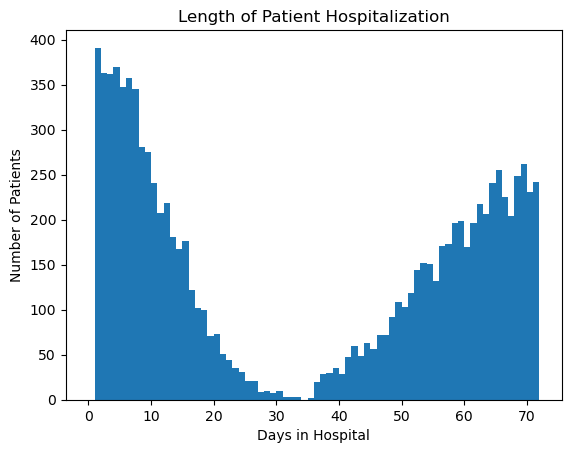

In [81]:
plt.hist(data=df, x="Initial_days", bins=np.arange(0,73,1))
plt.title("Length of Patient Hospitalization")
plt.xlabel("Days in Hospital")
plt.ylabel("Number of Patients")
plt.show()

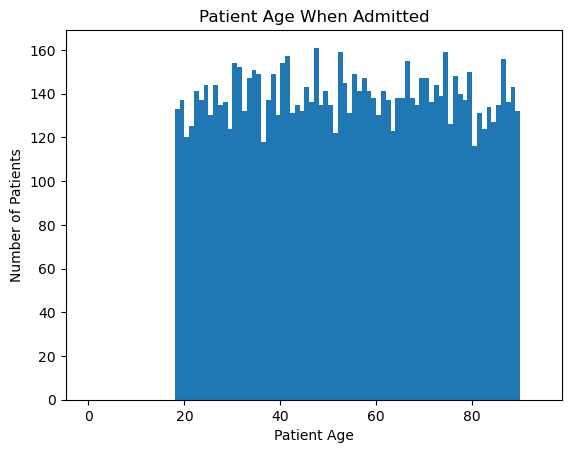

In [82]:
plt.hist(data=df, x="Age", bins=np.arange(0,95,1))
plt.title("Patient Age When Admitted")
plt.xlabel("Patient Age")
plt.ylabel("Number of Patients")
plt.show()

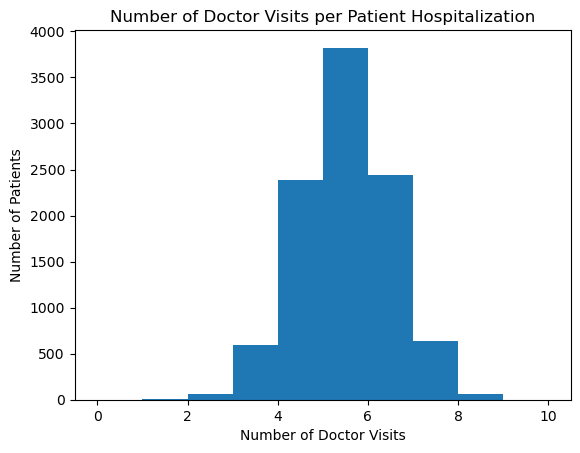

In [83]:
plt.hist(data=df, x="Doc_visits", bins=np.arange(0,11,1))
plt.title("Number of Doctor Visits per Patient Hospitalization")
plt.xlabel("Number of Doctor Visits")
plt.ylabel("Number of Patients")
plt.show()

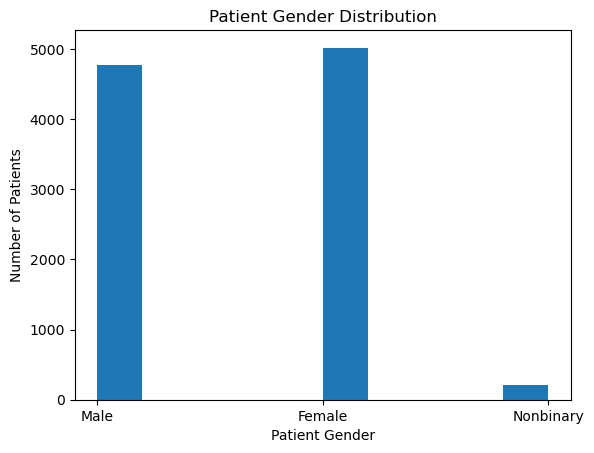

In [84]:
plt.hist(data=df, x="Gender")
plt.title("Patient Gender Distribution")
plt.xlabel("Patient Gender")
plt.ylabel("Number of Patients")
plt.show()

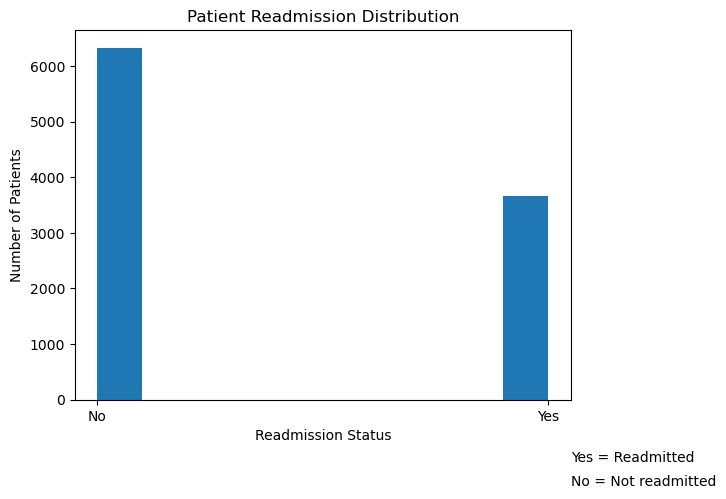

In [85]:
plt.hist(data=df, x="ReAdmis")
plt.title("Patient Readmission Distribution")
plt.xlabel("Readmission Status")
plt.ylabel("Number of Patients")
plt.figtext(0.9, -0.02, "Yes = Readmitted", ha="left")
plt.figtext(0.9, -0.07, "No = Not readmitted", ha="left")
plt.show()

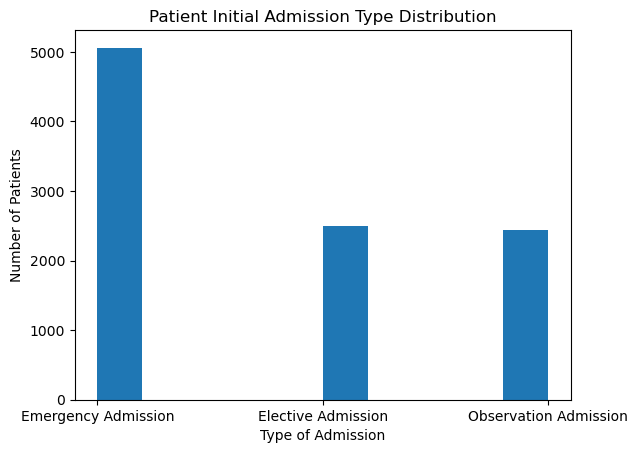

In [86]:
plt.hist(data=df, x="Initial_admin")
plt.title("Patient Initial Admission Type Distribution")
plt.xlabel("Type of Admission")
plt.ylabel("Number of Patients")
plt.show()

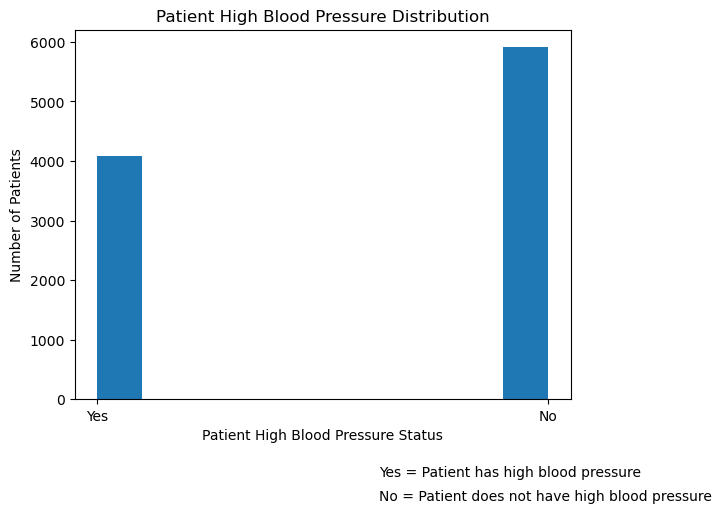

In [87]:
plt.hist(data=df, x="HighBlood")
plt.title("Patient High Blood Pressure Distribution")
plt.xlabel("Patient High Blood Pressure Status")
plt.ylabel("Number of Patients")
plt.figtext(0.6, -0.05, "Yes = Patient has high blood pressure", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have high blood pressure", ha="left")
plt.show()

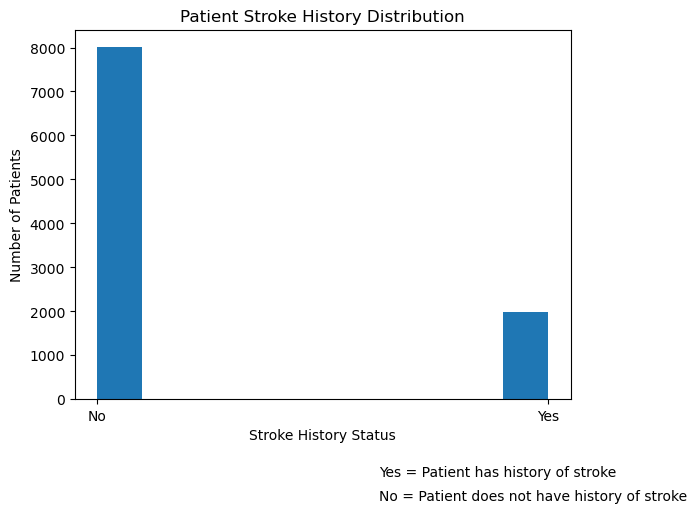

In [88]:
plt.hist(data=df, x="Stroke")
plt.title("Patient Stroke History Distribution")
plt.xlabel("Stroke History Status")
plt.ylabel("Number of Patients")
plt.figtext(0.6, -0.05, "Yes = Patient has history of stroke", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have history of stroke", ha="left")
plt.show()

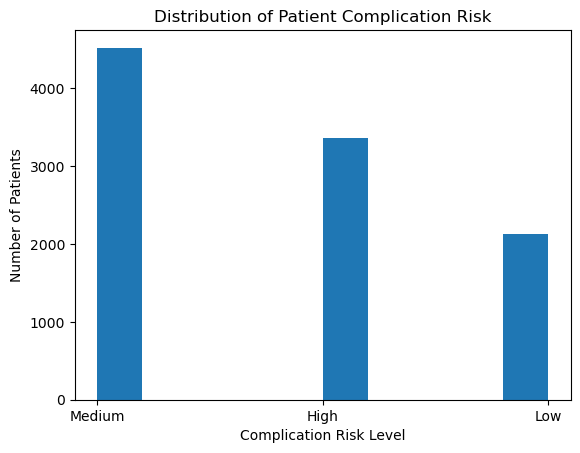

In [89]:
plt.hist(data=df, x="Complication_risk")
plt.title("Distribution of Patient Complication Risk")
plt.xlabel("Complication Risk Level")
plt.ylabel("Number of Patients")
plt.show()

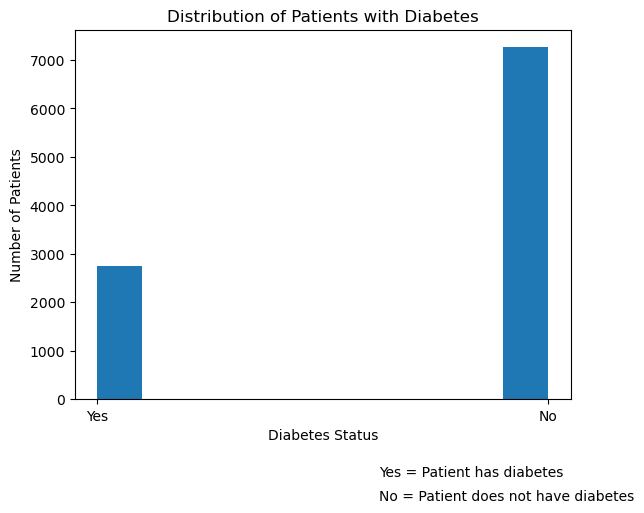

In [90]:
plt.hist(data=df, x="Diabetes")
plt.title("Distribution of Patients with Diabetes")
plt.xlabel("Diabetes Status")
plt.ylabel("Number of Patients")
plt.figtext(0.6, -0.05, "Yes = Patient has diabetes", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have diabetes", ha="left")
plt.show()

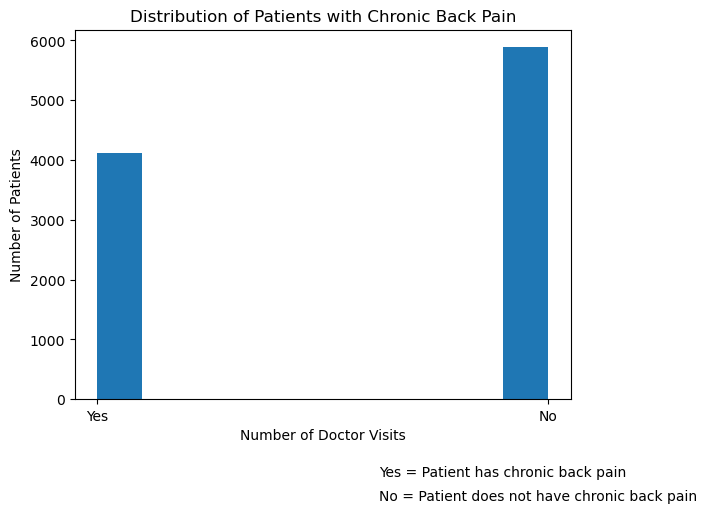

In [91]:
plt.hist(data=df, x="BackPain")
plt.title("Distribution of Patients with Chronic Back Pain")
plt.xlabel("Number of Doctor Visits")
plt.ylabel("Number of Patients")
plt.figtext(0.6, -0.05, "Yes = Patient has chronic back pain", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have chronic back pain", ha="left")
plt.show()

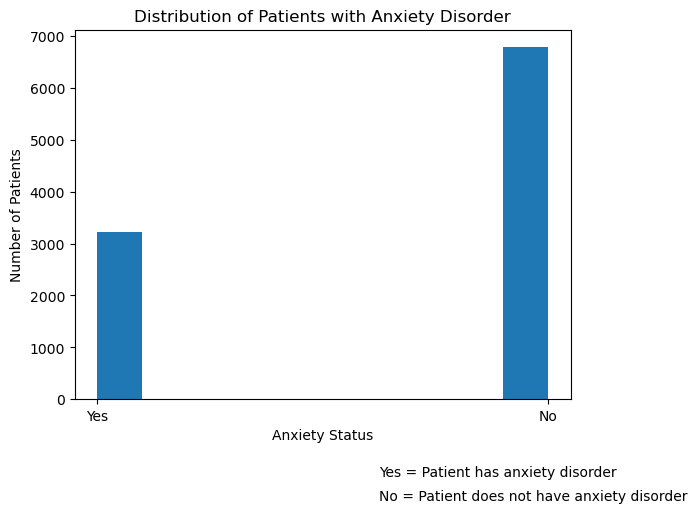

In [92]:
plt.hist(data=df, x="Anxiety")
plt.title("Distribution of Patients with Anxiety Disorder")
plt.xlabel("Anxiety Status")
plt.ylabel("Number of Patients")
plt.figtext(0.6, -0.05, "Yes = Patient has anxiety disorder", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have anxiety disorder", ha="left")
plt.show()

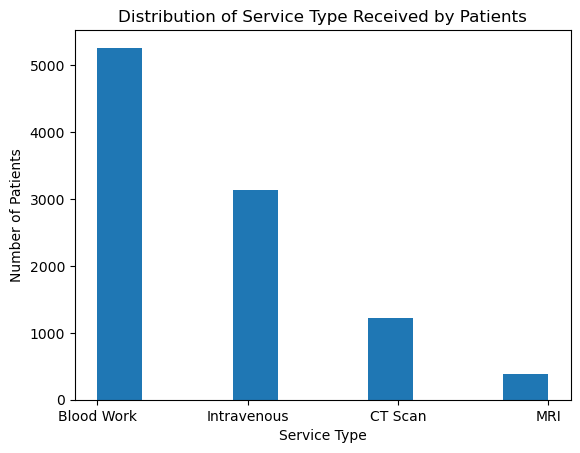

In [93]:
plt.hist(data=df, x="Services")
plt.title("Distribution of Service Type Received by Patients")
plt.xlabel("Service Type")
plt.ylabel("Number of Patients")
plt.show()

### Bivariate Visualizations

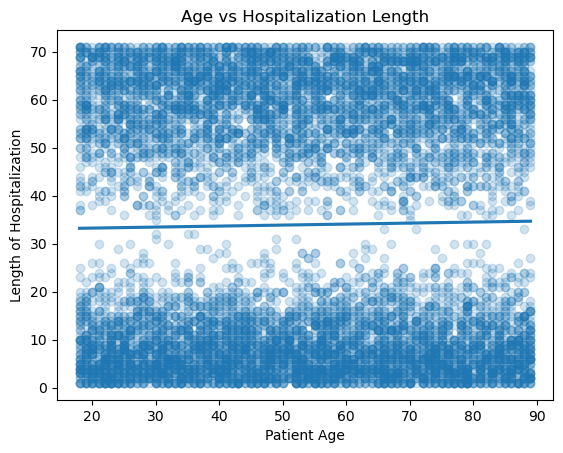

In [94]:
sns.regplot(x='Age', y='Initial_days', data=df, ci=None, scatter_kws={'alpha':1/5})
plt.title("Age vs Hospitalization Length")
plt.xlabel("Patient Age")
plt.ylabel("Length of Hospitalization")
plt.show()

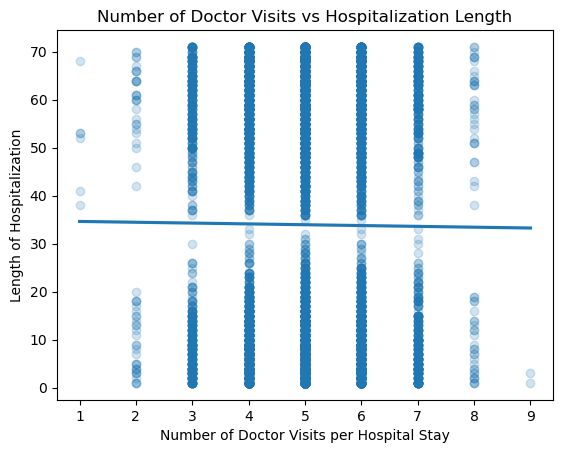

In [95]:
sns.regplot(x='Doc_visits', y='Initial_days', data=df, ci=None, scatter_kws={'alpha':1/5})
plt.title("Number of Doctor Visits vs Hospitalization Length")
plt.xlabel("Number of Doctor Visits per Hospital Stay")
plt.ylabel("Length of Hospitalization")
plt.show()

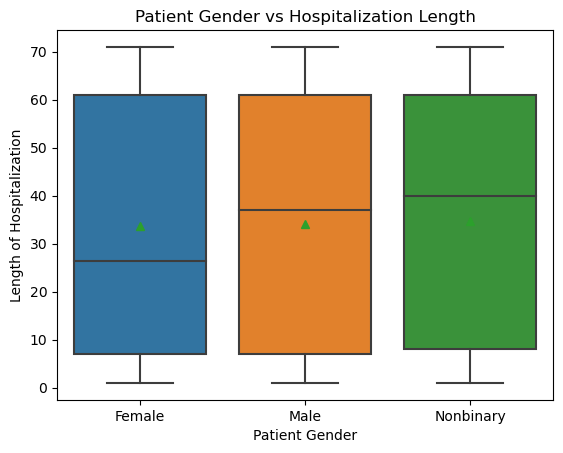

In [96]:
sns.boxplot(x='Gender', y='Initial_days', data=df,showmeans=True)
plt.title("Patient Gender vs Hospitalization Length")
plt.xlabel("Patient Gender")
plt.ylabel("Length of Hospitalization")
plt.show()

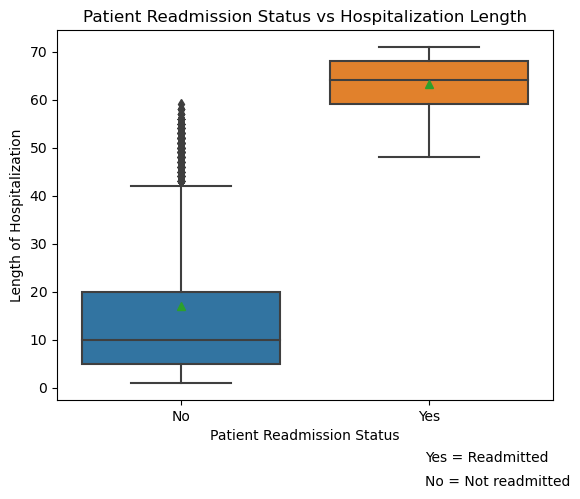

In [97]:
sns.boxplot(x='ReAdmis', y='Initial_days', data=df,showmeans=True)
plt.title("Patient Readmission Status vs Hospitalization Length")
plt.xlabel("Patient Readmission Status")
plt.ylabel("Length of Hospitalization")
plt.figtext(0.7, -0.02, "Yes = Readmitted", ha="left")
plt.figtext(0.7, -0.07, "No = Not readmitted", ha="left")
plt.show()

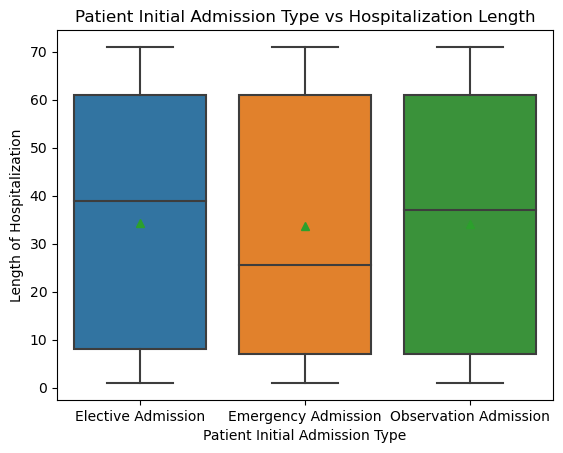

In [98]:
sns.boxplot(x='Initial_admin', y='Initial_days', data=df,showmeans=True)
plt.title("Patient Initial Admission Type vs Hospitalization Length")
plt.xlabel("Patient Initial Admission Type")
plt.ylabel("Length of Hospitalization")
plt.show()

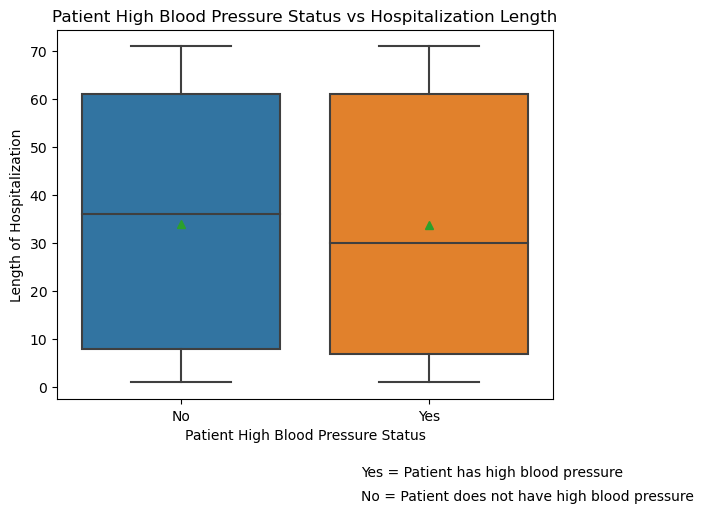

In [99]:
sns.boxplot(x='HighBlood', y='Initial_days', data=df,showmeans=True)
plt.title("Patient High Blood Pressure Status vs Hospitalization Length")
plt.xlabel("Patient High Blood Pressure Status")
plt.ylabel("Length of Hospitalization")
plt.figtext(0.6, -0.05, "Yes = Patient has high blood pressure", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have high blood pressure", ha="left")
plt.show()

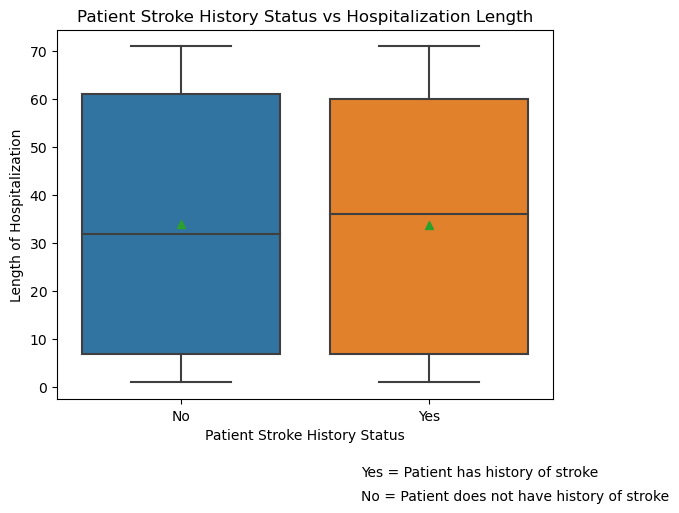

In [100]:
sns.boxplot(x='Stroke', y='Initial_days', data=df,showmeans=True)
plt.title("Patient Stroke History Status vs Hospitalization Length")
plt.xlabel("Patient Stroke History Status")
plt.ylabel("Length of Hospitalization")
plt.figtext(0.6, -0.05, "Yes = Patient has history of stroke", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have history of stroke", ha="left")
plt.show()

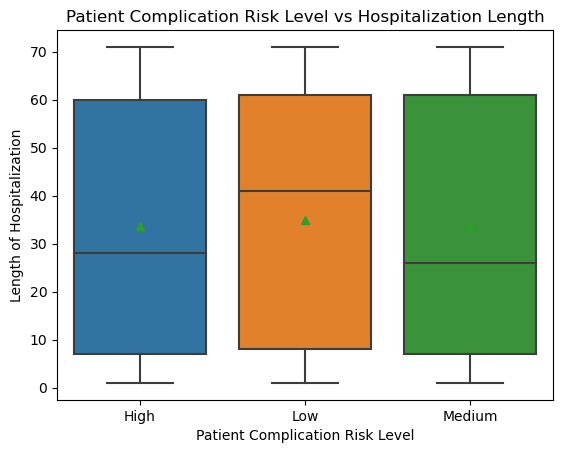

In [101]:
sns.boxplot(x='Complication_risk', y='Initial_days', data=df,showmeans=True)
plt.title("Patient Complication Risk Level vs Hospitalization Length")
plt.xlabel("Patient Complication Risk Level")
plt.ylabel("Length of Hospitalization")
plt.show()

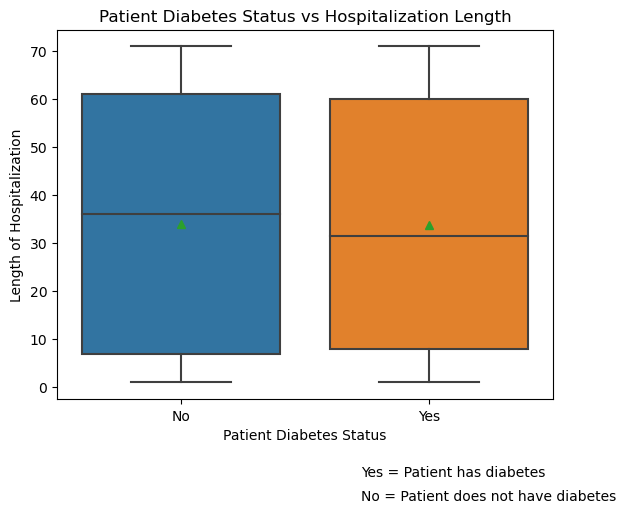

In [102]:
sns.boxplot(x='Diabetes', y='Initial_days', data=df,showmeans=True)
plt.title("Patient Diabetes Status vs Hospitalization Length")
plt.xlabel("Patient Diabetes Status")
plt.ylabel("Length of Hospitalization")
plt.figtext(0.6, -0.05, "Yes = Patient has diabetes", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have diabetes", ha="left")
plt.show()

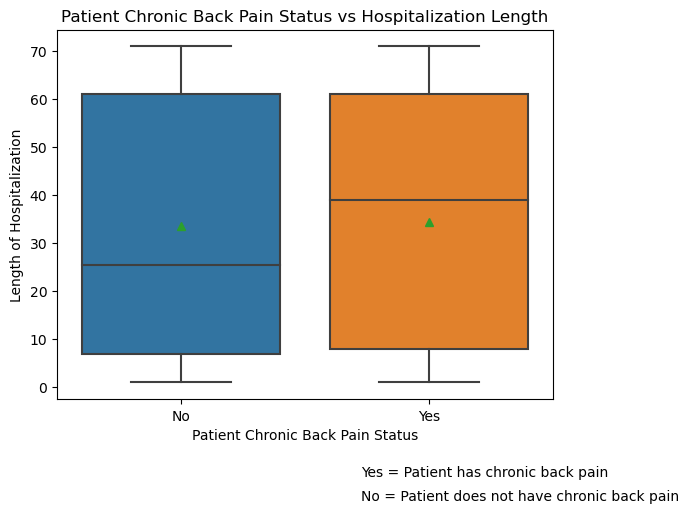

In [103]:
sns.boxplot(x='BackPain', y='Initial_days', data=df,showmeans=True)
plt.title("Patient Chronic Back Pain Status vs Hospitalization Length")
plt.xlabel("Patient Chronic Back Pain Status")
plt.ylabel("Length of Hospitalization")
plt.figtext(0.6, -0.05, "Yes = Patient has chronic back pain", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have chronic back pain", ha="left")
plt.show()

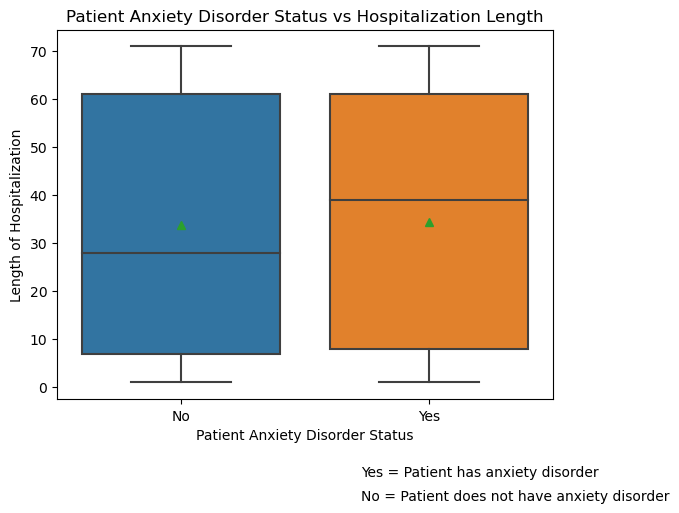

In [104]:
sns.boxplot(x='Anxiety', y='Initial_days', data=df,showmeans=True)
plt.title("Patient Anxiety Disorder Status vs Hospitalization Length")
plt.xlabel("Patient Anxiety Disorder Status")
plt.ylabel("Length of Hospitalization")
plt.figtext(0.6, -0.05, "Yes = Patient has anxiety disorder", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have anxiety disorder", ha="left")
plt.show()

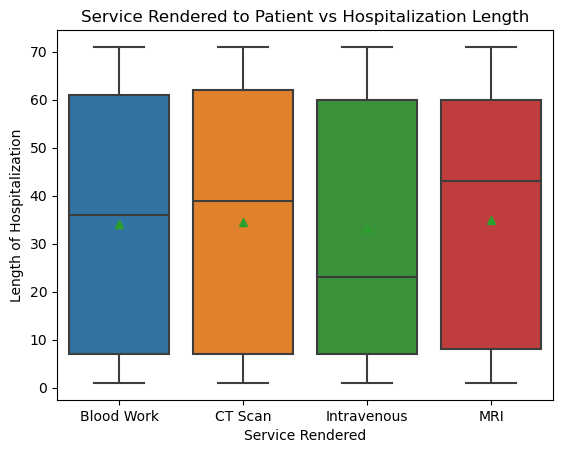

In [105]:
sns.boxplot(x='Services', y='Initial_days', data=df,showmeans=True)
plt.title("Service Rendered to Patient vs Hospitalization Length")
plt.xlabel("Service Rendered")
plt.ylabel("Length of Hospitalization")
plt.show()

## C4. Data Preparation
At a high level, my goals for data transformation/wrangling were to re-express the yes/no categorical variables as numbers, create dummy variables for nominal categorical variables, and create a new dataframe that holds only the variables of interest for multiple linear regression. 

For multiple linear regression, categorical variables of both ordinal and nominal type must be expressed numerically instead of their label names or regression will not work. Thus, I converted the yes/no categorical variables to 1's for yeses and 0's for nos. Since there are not more than 3 nominal categories for these variables, there was no need to do one-hot encoding, as the resulting column from one-hot encoding would look the same as simply mapping using a dictionary.

For variables that do have a higher cardinality of choices, however, I used one-hot encoding to create dummy variables, where we keep the "number of categories minus one" columns. For example, let's use Gender. If a 1 appears in the dummy column for male, we know the patient was male. If a 1 appears in the dummy column for female, we know the patient was female. If 0 appears in both columns, we know the patient was non-binary and we can drop the non-binary dummy column. I created dummy variables only for the variables I chose to include in my regression analysis since doing this for all of them potentially expands the number of columns so much.

The final step I took was to create a dataframe containing only the variables of interest. Details on why I omitted some variables from the analysis and included others can be found below.

Certain variables were chosen over other variables for analysis because I intuitively believed they might be more valuable. With regard to age, I thought it might be common sense that since older people tend to have more serious issues, they might have longer hospital stays. Gender was included because based on my intuition, it seems it might be likely that women are more likely to seek hospital care earlier than men, who might let the issue fester longer and thus end up with longer hospital stays. Readmission also seemed like a likely culprit for a longer hospital stay since the problem wasn't solved the first time the patient was hospitalized. Variables relating to conditions, such as HighBlood, Stroke, Diabetes, BackPain, and Anxiety seemed likely to contribute to longer hospital stays simply because they complicate the care required for the patient. Complication_risk was chosen for a similar reason-- if the risk of complications is higher, the care required for the patient has the potential to be more complex. Some variables were picked because of a logical relationship I intuitively believed could be present. Doc_visits was chosen because logically speaking, it would make sense that a doctor would visit a patient more the longer the patient stays hospitalized. Initial_admin was chosen because it seemed more likely that an emergency admission could lead to a longer hospitalization than the other two categories, as emergency situations tend to be more complex, though I lack domain knowledge on the subject. Finally, I picked Services because it makes sense that imaging procedures such as MRIs and CT scans are typically used for things that would require a hospital stay such as issues that require surgery. Blood work and intravenous injections, however, without imaging, would typically indicate that the issue was less serious.

There are a number of reasons some variables were intentionally left out of regression analysis. City, State, County, Zip, Area, TimeZone, and Job had too high a cardinality of nominal categories for me to include. Their inclusion would require the creation of dummy variables, which would expand the dataset's dimensionality. Especially in regards to Job, these variables expanded the dataset's dimensionality too much. Many of the other variables not yet mentioned simply seemed to have little to no bearing on hospital stay or might skew the data, at least, according to my intuition. These variables included things like customer_id, interaction, UID, Lat, Lng, Population, Children, Income, Marital,  VitD_levels, Full_meals_eaten, VitD_supp, Soft_Drink, Overweight, Arthritis, Hyperlipidemia, Allergic_rhinitis, Reflux_esophagitis, Asthma, TotalCharge, Additional_charges, and the variables with the naming convention "Item#." Many of the variables in this list that indicate whether or not a patient has a certain condition were left out because these conditions are not serious conditions and are generally taken care of and managed easily by a primary care physician. Thus, I did not see them having much impact on hospital stay duration. Other variables, like Income, might skew the data. If a person makes less money, they are more likely to leave against hospital advice due to being unable to pay the bill, shortening their stay. This might make patients who make less money look as though they are not at risk for long hospital stays, but in fact, they might still be.

Please use the attached ipynb file as the executable code required by this section.

In [106]:
# Create dictionary needed to re-map boolean columns.
boolean_map = {"No" : 0, "Yes" : 1}
# Map all boolean variables and convert to int
df["ReAdmis"] = df["ReAdmis"].map(boolean_map)
df["ReAdmis"] = df["ReAdmis"].astype("int64")
df["Soft_drink"] = df["Soft_drink"].map(boolean_map)
df["HighBlood"] = df["HighBlood"].map(boolean_map)
df["HighBlood"] = df["HighBlood"].astype('int64')
df["Stroke"] = df["Stroke"].map(boolean_map)
df["Stroke"] = df["Stroke"].astype('int64')
df["Overweight"] = df["Overweight"].map(boolean_map)
df["Arthritis"] = df["Arthritis"].map(boolean_map)
df["Diabetes"] = df["Diabetes"].map(boolean_map)
df["Diabetes"] = df["Diabetes"].astype('int64')
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(boolean_map)
df["BackPain"] = df["BackPain"].map(boolean_map)
df["BackPain"] = df["BackPain"].astype('int64')
df["Anxiety"] = df["Anxiety"].map(boolean_map)
df["Anxiety"] = df["Anxiety"].astype('int64')
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(boolean_map)
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(boolean_map)
df["Asthma"] = df["Asthma"].map(boolean_map)

# Check that these took.
df.head(10)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,Central,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10,3726.70,17939.40,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,Central,Community development worker,3,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15,4193.19,17613.00,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,Central,Chief Executive Officer,3,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4,2434.23,17505.19,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,Central,Early years teacher,0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1,2127.83,12993.44,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,Eastern,Health promotion specialist,1,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1,2113.07,3716.53,2,1,3,3,5,3,4,3
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,Central,Corporate treasurer,3,76,81999.88,Never Married,Male,0,19.612646,6,0,0,0,Observation Admission,0,0,Medium,1,1,1,0,1,0,1,0,0,Blood Work,5,2636.69,12742.59,4,5,4,4,3,5,4,6
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,Eastern,Hydrologist,0,50,10456.05,Never Married,Male,0,14.751687,6,0,0,0,Emergency Admission,1,0,Low,1,1,1,1,1,1,0,1,0,Intravenous,9,3694.63,16815.51,4,3,3,2,3,4,5,5
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,Eastern,Psychiatric nurse,7,40,38319.29,Divorced,Female,0,19.688673,7,2,0,0,Observation Admission,0,0,Medium,1,0,0,0,0,0,0,0,0,Intravenous,14,3021.50,6930.57,1,2,2,5,4,2,4,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,Central,Computer games developer,0,48,55586.48,Widowed,Male,0,19.653320,6,3,0,0,Emergency Admission,0,0,Low,1,0,0,1,0,0,0,0,0,Intravenous,6,2968.40,8363.19,3,3,2,3,3,3,4,2


In [107]:
# Create dummy variables, keeping k-1 category columns.
Gender_dummies = pd.get_dummies(data=df['Gender'], drop_first=True)
Initial_admin_dummies = pd.get_dummies(data=df['Initial_admin'], drop_first=True)
Comp_risk_dummies = pd.get_dummies(data=df['Complication_risk'], drop_first=True)
Services_dummies = pd.get_dummies(data=df['Services'], drop_first=True)

# Create regression variable only dataframe and insert dummy columns into it.
# [In-Text Citation: (GeeksforGeeks, 2023).]
MLR_df = df[['Age', 'ReAdmis', 'Doc_visits', 'HighBlood', 'Stroke', 'Diabetes',
            'BackPain', 'Anxiety', 'Initial_days']]
MLR_df.insert(1,"dummy_male", Gender_dummies.Male)
MLR_df.insert(1,"dummy_nonbinary", Gender_dummies.Nonbinary)
MLR_df.insert(5,"dummy_emergency", Initial_admin_dummies["Emergency Admission"])
MLR_df.insert(5,"dummy_observation", Initial_admin_dummies["Observation Admission"])
MLR_df.insert(9,"dummy_comp_risk_low", Comp_risk_dummies.Low)
MLR_df.insert(9,"dummy_comp_risk_medium", Comp_risk_dummies.Medium)
MLR_df.insert(14,"dummy_CT_scan", Services_dummies["CT Scan"])
MLR_df.insert(14,"dummy_intravenous", Services_dummies.Intravenous)
MLR_df.insert(14,"dummy_MRI", Services_dummies.MRI)

# Check new dataframe to see if insertions took.
# Compare to original dataframe to ensure order was kept in dummies.
MLR_df.head(20)

,Age,dummy_nonbinary,dummy_male,ReAdmis,Doc_visits,dummy_observation,dummy_emergency,HighBlood,Stroke,dummy_comp_risk_medium,dummy_comp_risk_low,Diabetes,BackPain,Anxiety,dummy_MRI,dummy_intravenous,dummy_CT_scan,Initial_days
CaseOrder,,,,,,,,,,,,,,,,,,
1,53,0,1,0,6,0,1,1,0,1,0,1,1,1,0,0,0,10
2,51,0,0,0,4,0,1,1,0,0,0,0,0,0,0,1,0,15
3,53,0,0,0,4,0,0,1,0,1,0,1,0,0,0,0,0,4
4,78,0,1,0,4,0,0,0,1,1,0,0,0,0,0,0,0,1
5,22,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,1,1
6,76,0,1,0,6,1,0,0,0,1,0,1,1,0,0,0,0,5
7,50,0,1,0,6,0,1,1,0,0,1,1,1,1,0,1,0,9
8,40,0,0,0,7,1,0,0,0,1,0,0,0,0,0,1,0,14
9,48,0,1,0,6,0,1,0,0,0,1,0,0,0,0,1,0,6


In [108]:
MLR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     10000 non-null  int64
 1   dummy_nonbinary         10000 non-null  uint8
 2   dummy_male              10000 non-null  uint8
 3   ReAdmis                 10000 non-null  int64
 4   Doc_visits              10000 non-null  int64
 5   dummy_observation       10000 non-null  uint8
 6   dummy_emergency         10000 non-null  uint8
 7   HighBlood               10000 non-null  int64
 8   Stroke                  10000 non-null  int64
 9   dummy_comp_risk_medium  10000 non-null  uint8
 10  dummy_comp_risk_low     10000 non-null  uint8
 11  Diabetes                10000 non-null  int64
 12  BackPain                10000 non-null  int64
 13  Anxiety                 10000 non-null  int64
 14  dummy_MRI               10000 non-null  uint8
 15  dummy_intravenous  

## C5. Prepared Dataset
A copy of the cleaned dataset prior to data wrangling/transformation (with the exception of boolean mapping) will be provided, as will a copy of the post-transformation dataframe limited to the variables I have picked for regression. I am providing both just to be safe.

The cleaned-only dataframe is titled "MLR_clean_not_transformed.csv" and the cleaned AND transformed dataframe is titled "MLR_cleaned_AND_transformed.csv".

In [109]:
df.to_csv('MLR_clean_not_transformed.csv', index=False)
MLR_df.to_csv('MLR_clean_AND_transformed.csv', index=False)

## D1. Initial Multiple Linear Regression Model
Below you will find my initial multiple linear regression model which includes all of the explanatory variables from section C3 and my response variable, initial_days. Please note I have not yet checked for multicollinearity and intend to do so immediately before model reduction. Variables that are multicollinear violate a key assumption of multiple linear regression given in B1 and could make the model unreliable if retained. The model summary can be found below.

In [110]:
init_model = ols('Initial_days ~ Age + dummy_nonbinary + dummy_male + ReAdmis + Doc_visits + dummy_observation + dummy_emergency + HighBlood + Stroke + dummy_comp_risk_medium + dummy_comp_risk_low + Diabetes + BackPain + Anxiety + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(init_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1550.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:34   Log-Likelihood:                -40425.
No. Observations:               10000   AIC:                         8.089e+04
Df Residuals:                    9982   BIC:                         8.102e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 18

## D2. Model Reduction Method
Before choosing a method to reduce the model, we must check for multicollinearity. As previously stated, retaining variables that are multicollinear violates an assumption of multiple linear regression, leading to a model that could be unreliable. Thus, below I will use the variance inflation factor (VIF) to check for multicollinearity between the initial model's variables. Explanatory variables with VIF > 10 will be investigated and omitted one at a time before true model reduction. When all explanatory variables have a VIF < 10, I can proceed to model reduction as this indicates multicollinearity that is too high to be acceptable has been eliminated.

In [111]:
# Check VIF and remove variable with highest value VIF until all variables have VIF under 10.
# First, isolate explanatory variables.
X = MLR_df[['Age', 'dummy_nonbinary', 'dummy_male', 'ReAdmis', 'Doc_visits', 'dummy_observation', 'dummy_emergency', 'HighBlood', 'Stroke', 'dummy_comp_risk_medium', 'dummy_comp_risk_low', 'Diabetes', 'BackPain', 'Anxiety', 'dummy_MRI', 'dummy_intravenous', 'dummy_CT_scan']]
VIF_df = pd.DataFrame()
VIF_df['feature'] = X.columns
VIF_df['VIF'] = [variance_inflation_factor(X.values,i)
for i in range(len(X.columns))]
print(VIF_df.sort_values('VIF', ascending=False))

                   feature        VIF
4               Doc_visits  10.493556
0                      Age   6.483807
6          dummy_emergency   2.837469
9   dummy_comp_risk_medium   2.243200
2               dummy_male   1.893389
5        dummy_observation   1.893081
12                BackPain   1.681219
7                HighBlood   1.670380
10     dummy_comp_risk_low   1.585195
15       dummy_intravenous   1.564986
3                  ReAdmis   1.564693
13                 Anxiety   1.458544
11                Diabetes   1.368297
8                   Stroke   1.242374
16           dummy_CT_scan   1.227150
14               dummy_MRI   1.070545
1          dummy_nonbinary   1.041968


In [112]:
# Let's remove Doc_visits, the only one with a VIF > 10.
# And then let's rerun this VIF check.
X = MLR_df[['Age', 'dummy_nonbinary', 'dummy_male', 'ReAdmis', 'dummy_observation', 'dummy_emergency', 'HighBlood', 'Stroke', 'dummy_comp_risk_medium', 'dummy_comp_risk_low', 'Diabetes', 'BackPain', 'Anxiety', 'dummy_MRI', 'dummy_intravenous', 'dummy_CT_scan']]
VIF_df = pd.DataFrame()
VIF_df['feature'] = X.columns
VIF_df['VIF'] = [variance_inflation_factor(X.values,i)
for i in range(len(X.columns))]
print(VIF_df.sort_values('VIF', ascending=False))

                   feature       VIF
0                      Age  4.795904
5          dummy_emergency  2.552036
8   dummy_comp_risk_medium  2.128607
2               dummy_male  1.821874
4        dummy_observation  1.750022
11                BackPain  1.647505
6                HighBlood  1.632833
3                  ReAdmis  1.541865
9      dummy_comp_risk_low  1.530753
14       dummy_intravenous  1.530130
12                 Anxiety  1.438551
10                Diabetes  1.348758
7                   Stroke  1.233187
15           dummy_CT_scan  1.212547
13               dummy_MRI  1.068048
1          dummy_nonbinary  1.039302


With Doc_visits removed, we have successfully removed any problematic multicollinearity. To reduce my model, I will use backwards stepwise elimination. This process will remove explanatory variables that do not provide value to the model because they are not statistically significant and hence do not inform the answer to the research question. In layman's terms, the variables I am about to remove using the method below have little to no relationship with the response variable, length of hospitalization, and are virtually useless. Thus, we will want to remove these "garbage" explanatory variables.

Backwards stepwise elimination is an iterative process where we remove the least statistically significant explanatory variable based on p-value until all explanatory variables are statistically significant. As is custom, I will set the p-value threshold to 0.05. Anything below this threshold will be considered statistically significant, while anything above will not. In backwards stepwise elimination I will remove the explanatory variable with the highest p-value until all p-values are under the threshold of 0.05.

To do this, I will run the multiple linear regression model in the same way I ran it for my initial model, but this time I will remove the explanatory variables with multicollinearity issues. In my case, this was just one variable-- Doc_visits. I will use the .summary() to pick out the explanatory variable with the highest p-value, eliminate it, and run the model again without it until the process is complete, as detailed above.

In [113]:
# Removed Doc_visits. Rerun model in the same way as initial model.
# Then check summary and remove highest p-value variable.
BSE1_model = ols('Initial_days ~ Age + dummy_nonbinary + dummy_male + ReAdmis + dummy_observation + dummy_emergency + HighBlood + Stroke + dummy_comp_risk_medium + dummy_comp_risk_low + Diabetes + BackPain + Anxiety + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE1_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1647.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:34   Log-Likelihood:                -40426.
No. Observations:               10000   AIC:                         8.089e+04
Df Residuals:                    9983   BIC:                         8.101e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17

In [114]:
# Removed Diabetes
BSE2_model = ols('Initial_days ~ Age + dummy_nonbinary + dummy_male + ReAdmis + dummy_observation + dummy_emergency + HighBlood + Stroke + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Anxiety + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE2_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1757.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:34   Log-Likelihood:                -40426.
No. Observations:               10000   AIC:                         8.088e+04
Df Residuals:                    9984   BIC:                         8.100e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17

In [115]:
# Removed dummy_MRI
BSE3_model = ols('Initial_days ~ Age + dummy_nonbinary + dummy_male + ReAdmis + dummy_observation + dummy_emergency + HighBlood + Stroke + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Anxiety + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE3_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1883.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:34   Log-Likelihood:                -40426.
No. Observations:               10000   AIC:                         8.088e+04
Df Residuals:                    9985   BIC:                         8.099e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17

In [116]:
# Removed dummy_nonbinary
BSE4_model = ols('Initial_days ~ Age + dummy_male + ReAdmis + dummy_observation + dummy_emergency + HighBlood + Stroke + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Anxiety + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE4_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     2028.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:34   Log-Likelihood:                -40426.
No. Observations:               10000   AIC:                         8.088e+04
Df Residuals:                    9986   BIC:                         8.098e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17

In [117]:
# Removed dummy_male
BSE5_model = ols('Initial_days ~ Age + ReAdmis + dummy_observation + dummy_emergency + HighBlood + Stroke + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Anxiety + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE5_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     2197.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:34   Log-Likelihood:                -40426.
No. Observations:               10000   AIC:                         8.088e+04
Df Residuals:                    9987   BIC:                         8.097e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17

In [118]:
# Removed dummy_intravenous
BSE6_model = ols('Initial_days ~ Age + ReAdmis + dummy_observation + dummy_emergency + HighBlood + Stroke + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Anxiety + dummy_CT_scan', data=MLR_df).fit()
print(BSE6_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     2397.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:34   Log-Likelihood:                -40426.
No. Observations:               10000   AIC:                         8.088e+04
Df Residuals:                    9988   BIC:                         8.096e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17

In [119]:
# Removed Age
BSE7_model = ols('Initial_days ~ ReAdmis + dummy_observation + dummy_emergency + HighBlood + Stroke + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Anxiety + dummy_CT_scan', data=MLR_df).fit()
print(BSE7_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     2637.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:34   Log-Likelihood:                -40426.
No. Observations:               10000   AIC:                         8.087e+04
Df Residuals:                    9989   BIC:                         8.095e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17

In [120]:
# Removed Stroke
BSE8_model = ols('Initial_days ~ ReAdmis + dummy_observation + dummy_emergency + HighBlood + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Anxiety + dummy_CT_scan', data=MLR_df).fit()
print(BSE8_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     2930.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:35   Log-Likelihood:                -40426.
No. Observations:               10000   AIC:                         8.087e+04
Df Residuals:                    9990   BIC:                         8.094e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17

In [121]:
# Removed dummy_observation
BSE9_model = ols('Initial_days ~ ReAdmis + dummy_emergency + HighBlood + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Anxiety + dummy_CT_scan', data=MLR_df).fit()
print(BSE9_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     3296.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:35   Log-Likelihood:                -40426.
No. Observations:               10000   AIC:                         8.087e+04
Df Residuals:                    9991   BIC:                         8.094e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17

In [122]:
# Removed dummy_comp_risk_medium
BSE10_model = ols('Initial_days ~ ReAdmis + dummy_emergency + HighBlood + dummy_comp_risk_low + BackPain + Anxiety + dummy_CT_scan', data=MLR_df).fit()
print(BSE10_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     3767.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:35   Log-Likelihood:                -40427.
No. Observations:               10000   AIC:                         8.087e+04
Df Residuals:                    9992   BIC:                         8.093e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              17.4050    

In [123]:
# Removed BackPain
BSE11_model = ols('Initial_days ~ ReAdmis + dummy_emergency + HighBlood + dummy_comp_risk_low + Anxiety + dummy_CT_scan', data=MLR_df).fit()
print(BSE11_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     4394.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:35   Log-Likelihood:                -40427.
No. Observations:               10000   AIC:                         8.087e+04
Df Residuals:                    9993   BIC:                         8.092e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              17.5280    

In [124]:
# Removed HighBlood
BSE12_model = ols('Initial_days ~ ReAdmis + dummy_emergency + dummy_comp_risk_low + Anxiety + dummy_CT_scan', data=MLR_df).fit()
print(BSE12_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     5272.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:35   Log-Likelihood:                -40428.
No. Observations:               10000   AIC:                         8.087e+04
Df Residuals:                    9994   BIC:                         8.091e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              17.3571    

In [125]:
# Removed Anxiety
BSE13_model = ols('Initial_days ~ ReAdmis + dummy_emergency + dummy_comp_risk_low + dummy_CT_scan', data=MLR_df).fit()
print(BSE13_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     6588.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:35   Log-Likelihood:                -40430.
No. Observations:               10000   AIC:                         8.087e+04
Df Residuals:                    9995   BIC:                         8.091e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              17.5359    

The last model, directly above, is my reduced model and my final model. Every variable has a p-value, indicated in the 5th column of the table, that is below 0.05. Thus, all of the remaining explanatory variables in the model are statistically significant. I will reiterate this below.

## D3. Reduced Multiple Linear Regression Model
For clarity, below you will again find my final reduced model.

Variables eliminated in multicollinearity checks:
1. Doc_visits

Variables eliminated in backwards stepwise elimination:
1. Diabetes
2. dummy_MRI
3. dummy_nonbinary
4. dummy_male
5. dummy_intravenous
6. Age
7. Stroke
8. dummy_observation
9. dummy_comp_risk_medium
10. BackPain
11. HighBlood
12. Anxiety

In [126]:
BSE13_model = ols('Initial_days ~ ReAdmis + dummy_emergency + dummy_comp_risk_low + dummy_CT_scan', data=MLR_df).fit()
print(BSE13_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     6588.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:06:35   Log-Likelihood:                -40430.
No. Observations:               10000   AIC:                         8.087e+04
Df Residuals:                    9995   BIC:                         8.091e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              17.5359    

## E1. Comparison of Initial Model vs. Reduced Model
To quantitatively compare my initial model and my reduced model, I will be using the adjusted r-squared value as my model evaluation metric. R-squared, also known as the coefficient of determination, tells us how much of the variance in the response variable, length of hospital stay, can be predicted by the explanatory variables. However, as you include more explanatory variables, this model evaluation metric inevitably continues to increase, even if there is little improvement in adding more explanatory variables. Thus, it is preferable to use adjusted r-squared, and this is the reason why I have chosen it over r-squared. With multiple explanatory variables, I prefer a metric that penalizes for each explanatory variable added. In this case, whether I choose r-squared or adjusted r-squared, the values of these metrics for my reduced model are the same. However, it is important to note that for multiple linear regression, it is generally better to use adjusted r-squared for model evaluation over r-squared. A model with a higher adjusted r-squared is a better model.

In [127]:
print('Initial model adj. r-sq: ' + str(round(init_model.rsquared_adj, 5)))
print('Reduced model adj. r-sq: ' + str(round(BSE13_model.rsquared_adj, 5)))

Initial model adj. r-sq: 0.72483
Reduced model adj. r-sq: 0.72489


Above, the initial model's adjusted r-squared is approximately 0.725. The reduced model's adjusted r-squared is approximately the same when rounded at 3 decimal places. The maximum for adjusted r-squared is 1, and the closer to 1 this value is, the better the model. Thus, since both models have extremely similar adjusted r-squared values, both models perform similarly to each other. It would be difficult to use adjusted r-squared alone to state one is better than the other. If we round at 5 decimal places, we can see that the reduced model outperforms the initial model by a very, very tiny amount. This amount is almost negligible. The adjusted r-squared for the reduced model is slightly higher at 0.72489 while the initial model's was 0.72483. Neither model's adjusted r-squared is impressive.

Since this result is so intriguing, we can also check another model evaluation metric, RSE, or residual standard error. This tells us about how far off the model's predictions are in general. This metric uses the unit days, the same unit as the response variable.

In [128]:
RSE_init = np.sqrt(init_model.mse_resid)
RSE_reduced = np.sqrt(BSE13_model.mse_resid)
print('Initial model RSE: ' + str(round(RSE_init, 3)) + ' days')
print('Reduced model RSE: ' + str(round(RSE_reduced, 3)) + ' days')

Initial model RSE: 13.797 days
Reduced model RSE: 13.795 days


Here we can more clearly see that the initial model actually performs just a bit worse. For RSE, a better model is indicated by a lower RSE. The reduced model's predictions of length of hospital stay are generally off by 13.797 days while the initial model's predictions are off by 13.795 days. This difference is extremely small, though, and we can say that the models are roughly as good as each other. However, due to the issue with multicollinearity, using the initial model as the final model is still not advisable.

Lastly, the models differed based on the explanatory variables included. This is obvious, but out of an abundance of caution, I will re-state that here. The initial model had 17 explanatory variables (this value counts each dummy variable as its own explanatory variable.) The reduced model ended up containing only 4 explanatory variables. Doc_visits was removed due to a multicollinearity issue. Diabetes, dummy_MRI, dummy_nonbinary, dummy_male, dummy_intravenous, Age, Stroke, dummy_observation, dummy_comp_risk_medium, BackPain, HighBlood, and Anxiety were removed during backwards stepwise elimination due to their high p-values and thus lack of statistical significance, which indicated their relationship to the response variable, length of hospital stay, was poor.

## E2. Analysis Outputs
Despite having already provided RSE for both models above, I will recalculate the reduced model's RSE here for clarity.

In [129]:
RSE_reduced = np.sqrt(BSE13_model.mse_resid)
print('Reduced model RSE: ' + str(round(RSE_reduced, 3)) + ' days')

Reduced model RSE: 13.795 days


In addition to this, below you will find the residual plot for the reduced model.

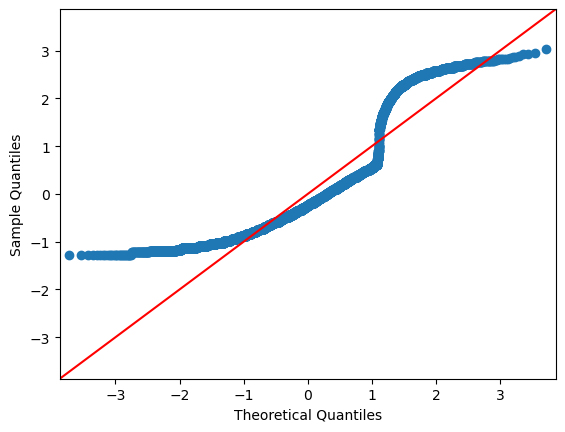

In [130]:
qqplot(data=BSE13_model.resid, fit=True, line='45')
plt.show()

Ideally, the plot above should show the blue dots closely following the red reference line. The more closely they follow this line, the better the model's fit. A "perfect" model that follows the red line exactly indicates the model's residuals are normally distributed. The curviness of the line of blue dots in the above graph indicates the reduced model's fit could be improved as its residuals are not very normally distributed.

## E3. Multiple Linear Regression Model Code
The attached ipynb file contains all of the code used for cleaning, transformation, exploration, and the linear models themselves. Please utilize this file as the executable code required by this section.

## F1. Regression Equation, Interpretation, Significance, and Limitations

### Regression Equation

The regression equation for the reduced model is as follows, using the parameters below:

**ŷ = 17.535854 + 46.469335(*readmission*) - 1.483961(*emergency admission*) + 1.151676(*complication risk low*) - 1.006527(*CT scan service*)**

In [131]:
BSE13_model.params

Intercept              17.535854
ReAdmis                46.469335
dummy_emergency        -1.483961
dummy_comp_risk_low     1.151676
dummy_CT_scan          -1.006527
dtype: float64

### Coefficient Interpretation
One can interpret this equation by interpreting each coefficient separately. The only explanatory variables that remain are "indicator variables" where a value of 1 in the column indicates a "yes" to the column's condition (i.e. a 1 in the ReAdmis column indicates that the patient *was* readmitted.) For this type of variable, we cannot say "For one unit increase of explanatory variable A, the response variable increases by this much" because that wouldn't make sense. Each column can only be 1 or 0. Thus, it is important to note that for indicator variables such as these, the coefficient represents not the amount the response variable changes per unit increase, but the *average difference in the response variable for the group identified by the indicator variable* with respect to the reference group (Using and Interpreting Indicator (Dummy) Variables — Unifying Data Science, n.d.). For an indicator variable, the reference group is the "omitted group"  or the group for which the indicator is equal to zero. In each statement made below, all other variables are held constant.

* People who are readmitted spend about 46.47 more days hospitalized than those who were *not* readmitted.
* People who were admitted as emergencies spend about 1.48 fewer days hospitalized than those who were admitted electively or for observation.
* People who have a low complication risk spend about 1.15 more days hospitalized than those who have a high or medium complication risk.
* People who receive the CT scan service spend about 1.01 fewer days hospitalized than those who receive MRIs, blood work, or intravenous injections.
* For people who are not readmissions, are not emergencies, do not have a low complication risk, and do not receive a CT scan, the expected length of hospitalization is about 17.54 days.

### Statistical Significance
From a purely statistical standpoint, I would say that this reduced model does indeed have statistical significance. This is based on the f-statistic for the model, which is given in the .summary(). Since the f-statistic was 0.00, we can say the reduced model is statistically significant since it is under the commonly used threshold of 0.05. Anything under this threshold means that is more than likely the relationships seen are not due to random chance.

### Practical Significance
Three of the four explanatory variables in the reduced model are outside of the hospital's control. If the hospital's goal were to manipulate the explanatory variables (factors) that lead to an increased length of hospitalization, they would likely be unable to influence whether or not a patient was admitted as an emergency, what complication risk a patient has, or whether or not the patient needs a CT scan.

Patients or chance events tend to choose the way patients are admitted. For example, if someone is having a heart attack, that is a chance event, and provided the person having the heart attack goes to the hospital, there is nothing that will make that not an emergency. If a patient thinks they are having a heart attack and it is really indigestion, there is little that will stop them from deciding to head to the emergency department if they want to seek medical care.

Hospital care is typically very scientific. For example, if a patient meets a certain set of symptoms, they might automatically require a CT scan to ensure that nothing dangerous is going on. Thus, this is also not a factor the hospital can control without causing more harm than good. Just because this factor decreases hospital stay length does not mean *everyone* should get a CT scan-- think of the unneeded radiation!

Complication risk is a criterion which accompanies the patient in the door and is normally a culmination of other factors like underlying disease or the presence of bad habits (or lack thereof.) There is likely not much a hospital can do to influence this, as these sorts of things are probably managed at the primary care physician level if at all. The hospital might try to direct patients towards good habits and healthy lifestyles, but their influence is limited beyond the hospital visit and a proactive program's results might take years to manifest if it is able to create any change at all.

The one factor the hospital might be able to influence is readmission rates. In this model, it is the single most influential variable. Those who are readmitted spend almost 47 more days hospitalized than those who are not readmitted. While there is little practical significance in the first three variables discussed, there might be some practical significance in trying to influence the last predicting variable, readmission. The other variables increase or decrease the days in the hospital by just a day or two. If the hospital can find a way to reduce readmission rates, this would be a significant improvement. In addition, if a patient comes in and is a readmission, the hospital will know immediately that the patient is at risk of a lengthy hospital stay over those who are not readmissions and can be more proactive in how they manage care for readmitted patients.

Because of the magnitude of change that could occur if the hospital could reduce readmission, I would say that the model does have *some* practical significance, even though the other three variables are outside the hospital's control.

### Limitations
1. The original dataset is missing certain demographics and segments.

The analysis could be flawed from the outset by the lack of inclusion of those under the age of 18 and those hospitalized for less than one day. If these data segments were included, the relationships between the length of hospital stay and the explanatory variables might be stronger or weaker or not exist at all. Leaving out these segments of data also potentially introduces bias.

2. Using backwards stepwise elimination resulted in the elimination of potentially significant factors.

During backwards stepwise elimination, it could be argued that Anxiety should have been kept since its p-value of 0.057 was very close to the threshold of 0.05. If I had chosen a slightly higher threshold of 0.06, Anxiety would have been statistically significant and worth keeping in the model. A 6% chance the correlation identified is due to random chance is not that much more than a 5% chance. The selection of the p-value is up to the analyst and choosing the common 0.05 threshold may have limited my model too much by eliminating a valuable predicting variable.

3. Multiple linear regression is sensitive to outliers, which I chose to keep.
There is always the possibility that the outliers I chose to keep, while I believed they were legitimate data based on intuition and references, were actually bad data. Outliers can badly influence a multiple linear regression model, falsely increasing or decreasing the strength of the linear relationship between an explanatory variable and the response variable.

## F2. Recommendation Based on Analysis
Since the only explanatory variable that has any practical significance is readmission, I would recommend the hospital try to focus on reducing the number of readmissions they receive. This is a broad goal that may require more analysis (such as logistic regression) to find out what factors influence readmission. Thus, to further the goal of reducing readmission, since it is a categorical variable, I would recommend running logistic regression with the response variable being readmission. This should provide some insight into how to reduce readmission, or at least allow the hospital to be proactive about it.

I would also recommend perhaps re-running the multiple linear regression on a more complete dataset that includes children and those hospitalized for less than a day. If it makes more sense to analyze children separately because their care is so different, then multiple linear regression should be run on a dataset of children with the response variable length of hospital stay.

## G. Panopto Video
Please find the link to my Panopto video below.

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=451ee700-f866-4e5a-b9b5-b0f10019258a#

## H. Code Sources
GeeksforGeeks. (2023, November 30). How to add column from another DataFrame in Pandas.<br>
&emsp;&emsp;https://www.geeksforgeeks.org/how-to-add-column-from-another-dataframe-in-pandas/

Kleppen, E. (2023, May 11). *How to Find Outliers in Data Using Python (and How to Handle Them).* CareerFoundry.<br>
&emsp;&emsp;https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

Nelson, M. (2023, August 8). *D206: Data Cleaning Performance Assessment.* Unpublished manuscript, Western Governors University.

## I. Content Sources

Frost, J. (2023, January 29). Multicollinearity in Regression Analysis: Problems, detection, and solutions. Statistics by Jim.<br>
&emsp;&emsp; https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

SudoPurge. (2021, December 16). Python vs. R for Data Science - and why you are wasting your time | Towards Data Science. Medium.<br>
&emsp;&emsp; https://towardsdatascience.com/python-vs-r-for-data-science-cf2699dfff4b

U.S. Department of Health and Human Services. (2022, November 8). Vitamin D Fact Sheet for Consumers. National Institutes of Health Office of Dietary<br>
&emsp;&emsp;Supplements. https://ods.od.nih.gov/factsheets/VitaminD-Consumer/

Using and interpreting indicator (Dummy) variables — unifying data science. (n.d.). https://www.unifyingdatascience.org/html/interpreting_indicator_vars.html

Zach. (2021, November 16). The five assumptions of multiple linear regression. Statology. https://www.statology.org/multiple-linear-regression-assumptions/